In [1]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging

# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()


In [2]:
# BATCH_SIZE = 64
# window_size = 6
# prediction_horizon = 6
# target_col = 'value'

# input_folder = 'data/ohio-data/processed'
# output_folder_train = 'data/ohio-data/processed/cleaned'  # Create a subfolder for processed files
# output_folder_test = 'data/ohio-data/processed/cleaned_test'
scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5min', agg_func='mean')

In [3]:
model_type = 'shared-layer'
patients_list = ['559', '563', '570', '575', '588', '591', '540', '544', '552', '567', '584', '596']

# train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon,
#                                                                                     model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)


In [4]:
# prediction_horizons = [15,30,60,90,120,150,180]
# prediction_horizons = [3, 6, 12, 18, 24, 30, 36]
prediction_horizons = [6]

histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [6]:
# train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon,
#                                                                                     model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
    

In [ ]:
mask_value = 2.5

In [5]:
for prediction_horizon in prediction_horizons:
    logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
    print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
   
    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                    window_size,BATCH_SIZE, prediction_horizon,
                                                                                    model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
    
    # model = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
    # model = model.to(device)
    # model, history = train_model(model, train_loader, val_loader = validation_loader, epochs=100, learning_rate=0.00001, model_type = model_type)
    # histories_withval_PHs[prediction_horizon] = history

    model_all_train = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
    model_all_train = model_all_train.to(device)
    model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=200, learning_rate=0.00001, model_type = model_type)
    histories_noval_PHs[prediction_horizon] = history2


    model_all_train.eval()
    each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


    # logger.info(f"Average MAE of Prediction Horizon {str(prediction_horizon)}: {mae}")
    # logger.info(f"Average RMSE of Prediction Horizon {str(prediction_horizon)}: {rmse}")
    # print(f"Average MAE of Prediction Horizon {str(prediction_horizon)}: {mae}")
    # print(f"Average RMSE of Prediction Horizon {str(prediction_horizon)}: {rmse}")

    
    abs_patients_errors_PHs[prediction_horizon] = each_patient_mae
    squared_patients_errors_PHs[prediction_horizon] = each_patient_rmse
    # MAE_Patients_PHs[prediction_horizon] = mae
    # RMSE_Patients_PHs[prediction_horizon] = rmse


    logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
    print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
    torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}.pth')
    print(f"model_{model_type}_attention_{str(prediction_horizon)} saved")
    logger.info(f"model_{model_type}_attention_{str(prediction_horizon)} saved")


Start Prediction Horizon 6 of shared-layer model
Shape of X (features): (12, 13618, 6)
Shape of y (targets): (12, 13618)
Shape of X_test (features): (12, 3939, 6)
Shape of y_test (targets): (12, 3939)


Epoch 1/200: 100%|██████████| 213/213 [00:12<00:00, 16.93batch/s, mae_loss=0.639]


Epoch [1/200], Training MAE: 0.6599, Training RMSE: 0.9015
Epoch [1/200], Validation MAE: 0.5319, Validation RMSE: 0.8059


Epoch 2/200: 100%|██████████| 213/213 [00:16<00:00, 12.97batch/s, mae_loss=0.636]


Epoch [2/200], Training MAE: 0.6487, Training RMSE: 0.8890
Epoch [2/200], Validation MAE: 0.5241, Validation RMSE: 0.7946


Epoch 3/200: 100%|██████████| 213/213 [00:14<00:00, 14.99batch/s, mae_loss=0.591]


Epoch [3/200], Training MAE: 0.6374, Training RMSE: 0.8743
Epoch [3/200], Validation MAE: 0.5155, Validation RMSE: 0.7811


Epoch 4/200: 100%|██████████| 213/213 [00:13<00:00, 15.36batch/s, mae_loss=0.647]


Epoch [4/200], Training MAE: 0.6241, Training RMSE: 0.8566
Epoch [4/200], Validation MAE: 0.5040, Validation RMSE: 0.7642


Epoch 5/200: 100%|██████████| 213/213 [00:13<00:00, 15.90batch/s, mae_loss=0.599]


Epoch [5/200], Training MAE: 0.6069, Training RMSE: 0.8340
Epoch [5/200], Validation MAE: 0.4894, Validation RMSE: 0.7418


Epoch 6/200: 100%|██████████| 213/213 [00:11<00:00, 17.83batch/s, mae_loss=0.592]


Epoch [6/200], Training MAE: 0.5854, Training RMSE: 0.8058
Epoch [6/200], Validation MAE: 0.4708, Validation RMSE: 0.7145


Epoch 7/200: 100%|██████████| 213/213 [00:14<00:00, 14.72batch/s, mae_loss=0.568]


Epoch [7/200], Training MAE: 0.5591, Training RMSE: 0.7715
Epoch [7/200], Validation MAE: 0.4480, Validation RMSE: 0.6804


Epoch 8/200: 100%|██████████| 213/213 [00:11<00:00, 18.18batch/s, mae_loss=0.487]


Epoch [8/200], Training MAE: 0.5277, Training RMSE: 0.7309
Epoch [8/200], Validation MAE: 0.4220, Validation RMSE: 0.6408


Epoch 9/200: 100%|██████████| 213/213 [00:27<00:00,  7.77batch/s, mae_loss=0.456]


Epoch [9/200], Training MAE: 0.4932, Training RMSE: 0.6859
Epoch [9/200], Validation MAE: 0.3940, Validation RMSE: 0.5979


Epoch 10/200: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.439]


Epoch [10/200], Training MAE: 0.4580, Training RMSE: 0.6401
Epoch [10/200], Validation MAE: 0.3653, Validation RMSE: 0.5537


Epoch 11/200: 100%|██████████| 213/213 [00:16<00:00, 12.84batch/s, mae_loss=0.43] 


Epoch [11/200], Training MAE: 0.4252, Training RMSE: 0.5968
Epoch [11/200], Validation MAE: 0.3395, Validation RMSE: 0.5139


Epoch 12/200: 100%|██████████| 213/213 [00:13<00:00, 16.05batch/s, mae_loss=0.408]


Epoch [12/200], Training MAE: 0.3988, Training RMSE: 0.5624
Epoch [12/200], Validation MAE: 0.3183, Validation RMSE: 0.4820


Epoch 13/200: 100%|██████████| 213/213 [00:13<00:00, 15.68batch/s, mae_loss=0.374]


Epoch [13/200], Training MAE: 0.3789, Training RMSE: 0.5364
Epoch [13/200], Validation MAE: 0.3035, Validation RMSE: 0.4596


Epoch 14/200: 100%|██████████| 213/213 [00:13<00:00, 16.26batch/s, mae_loss=0.366]


Epoch [14/200], Training MAE: 0.3668, Training RMSE: 0.5210
Epoch [14/200], Validation MAE: 0.2928, Validation RMSE: 0.4453


Epoch 15/200: 100%|██████████| 213/213 [00:17<00:00, 11.87batch/s, mae_loss=0.377]


Epoch [15/200], Training MAE: 0.3581, Training RMSE: 0.5102
Epoch [15/200], Validation MAE: 0.2855, Validation RMSE: 0.4361


Epoch 16/200: 100%|██████████| 213/213 [00:21<00:00,  9.99batch/s, mae_loss=0.341]


Epoch [16/200], Training MAE: 0.3535, Training RMSE: 0.5045
Epoch [16/200], Validation MAE: 0.2801, Validation RMSE: 0.4302


Epoch 17/200: 100%|██████████| 213/213 [00:19<00:00, 11.02batch/s, mae_loss=0.322]


Epoch [17/200], Training MAE: 0.3497, Training RMSE: 0.5001
Epoch [17/200], Validation MAE: 0.2753, Validation RMSE: 0.4258


Epoch 18/200: 100%|██████████| 213/213 [00:21<00:00,  9.90batch/s, mae_loss=0.366]


Epoch [18/200], Training MAE: 0.3467, Training RMSE: 0.4968
Epoch [18/200], Validation MAE: 0.2719, Validation RMSE: 0.4229


Epoch 19/200: 100%|██████████| 213/213 [00:19<00:00, 11.04batch/s, mae_loss=0.326]


Epoch [19/200], Training MAE: 0.3440, Training RMSE: 0.4936
Epoch [19/200], Validation MAE: 0.2698, Validation RMSE: 0.4207


Epoch 20/200: 100%|██████████| 213/213 [00:16<00:00, 12.81batch/s, mae_loss=0.344]


Epoch [20/200], Training MAE: 0.3416, Training RMSE: 0.4913
Epoch [20/200], Validation MAE: 0.2668, Validation RMSE: 0.4178


Epoch 21/200: 100%|██████████| 213/213 [00:16<00:00, 13.25batch/s, mae_loss=0.339]


Epoch [21/200], Training MAE: 0.3401, Training RMSE: 0.4896
Epoch [21/200], Validation MAE: 0.2648, Validation RMSE: 0.4155


Epoch 22/200: 100%|██████████| 213/213 [00:16<00:00, 12.82batch/s, mae_loss=0.321]


Epoch [22/200], Training MAE: 0.3373, Training RMSE: 0.4861
Epoch [22/200], Validation MAE: 0.2627, Validation RMSE: 0.4132


Epoch 23/200: 100%|██████████| 213/213 [00:17<00:00, 11.90batch/s, mae_loss=0.324]


Epoch [23/200], Training MAE: 0.3354, Training RMSE: 0.4841
Epoch [23/200], Validation MAE: 0.2609, Validation RMSE: 0.4113


Epoch 24/200: 100%|██████████| 213/213 [00:17<00:00, 11.91batch/s, mae_loss=0.344]


Epoch [24/200], Training MAE: 0.3335, Training RMSE: 0.4817
Epoch [24/200], Validation MAE: 0.2590, Validation RMSE: 0.4091


Epoch 25/200: 100%|██████████| 213/213 [00:15<00:00, 13.92batch/s, mae_loss=0.327]


Epoch [25/200], Training MAE: 0.3314, Training RMSE: 0.4793
Epoch [25/200], Validation MAE: 0.2570, Validation RMSE: 0.4071


Epoch 26/200: 100%|██████████| 213/213 [00:18<00:00, 11.79batch/s, mae_loss=0.347]


Epoch [26/200], Training MAE: 0.3289, Training RMSE: 0.4761
Epoch [26/200], Validation MAE: 0.2551, Validation RMSE: 0.4045


Epoch 27/200: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.323]


Epoch [27/200], Training MAE: 0.3272, Training RMSE: 0.4739
Epoch [27/200], Validation MAE: 0.2535, Validation RMSE: 0.4030


Epoch 28/200: 100%|██████████| 213/213 [00:27<00:00,  7.84batch/s, mae_loss=0.293]


Epoch [28/200], Training MAE: 0.3250, Training RMSE: 0.4717
Epoch [28/200], Validation MAE: 0.2512, Validation RMSE: 0.3999


Epoch 29/200: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.32] 


Epoch [29/200], Training MAE: 0.3230, Training RMSE: 0.4688
Epoch [29/200], Validation MAE: 0.2497, Validation RMSE: 0.3976


Epoch 30/200: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.31] 


Epoch [30/200], Training MAE: 0.3212, Training RMSE: 0.4671
Epoch [30/200], Validation MAE: 0.2476, Validation RMSE: 0.3952


Epoch 31/200: 100%|██████████| 213/213 [00:28<00:00,  7.55batch/s, mae_loss=0.307]


Epoch [31/200], Training MAE: 0.3188, Training RMSE: 0.4643
Epoch [31/200], Validation MAE: 0.2463, Validation RMSE: 0.3933


Epoch 32/200: 100%|██████████| 213/213 [00:27<00:00,  7.81batch/s, mae_loss=0.312]


Epoch [32/200], Training MAE: 0.3170, Training RMSE: 0.4618
Epoch [32/200], Validation MAE: 0.2448, Validation RMSE: 0.3913


Epoch 33/200: 100%|██████████| 213/213 [00:27<00:00,  7.78batch/s, mae_loss=0.283]


Epoch [33/200], Training MAE: 0.3146, Training RMSE: 0.4592
Epoch [33/200], Validation MAE: 0.2429, Validation RMSE: 0.3890


Epoch 34/200: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.312]


Epoch [34/200], Training MAE: 0.3127, Training RMSE: 0.4571
Epoch [34/200], Validation MAE: 0.2413, Validation RMSE: 0.3867


Epoch 35/200: 100%|██████████| 213/213 [00:26<00:00,  7.90batch/s, mae_loss=0.318]


Epoch [35/200], Training MAE: 0.3106, Training RMSE: 0.4542
Epoch [35/200], Validation MAE: 0.2395, Validation RMSE: 0.3844


Epoch 36/200: 100%|██████████| 213/213 [00:27<00:00,  7.85batch/s, mae_loss=0.326]


Epoch [36/200], Training MAE: 0.3084, Training RMSE: 0.4519
Epoch [36/200], Validation MAE: 0.2372, Validation RMSE: 0.3819


Epoch 37/200: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.279]


Epoch [37/200], Training MAE: 0.3068, Training RMSE: 0.4496
Epoch [37/200], Validation MAE: 0.2357, Validation RMSE: 0.3800


Epoch 38/200: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.317]


Epoch [38/200], Training MAE: 0.3051, Training RMSE: 0.4474
Epoch [38/200], Validation MAE: 0.2342, Validation RMSE: 0.3780


Epoch 39/200: 100%|██████████| 213/213 [00:23<00:00,  8.93batch/s, mae_loss=0.308]


Epoch [39/200], Training MAE: 0.3025, Training RMSE: 0.4448
Epoch [39/200], Validation MAE: 0.2324, Validation RMSE: 0.3759


Epoch 40/200: 100%|██████████| 213/213 [00:27<00:00,  7.69batch/s, mae_loss=0.287]


Epoch [40/200], Training MAE: 0.3007, Training RMSE: 0.4424
Epoch [40/200], Validation MAE: 0.2313, Validation RMSE: 0.3736


Epoch 41/200: 100%|██████████| 213/213 [00:27<00:00,  7.86batch/s, mae_loss=0.29] 


Epoch [41/200], Training MAE: 0.2991, Training RMSE: 0.4403
Epoch [41/200], Validation MAE: 0.2293, Validation RMSE: 0.3715


Epoch 42/200: 100%|██████████| 213/213 [00:28<00:00,  7.56batch/s, mae_loss=0.305]


Epoch [42/200], Training MAE: 0.2967, Training RMSE: 0.4376
Epoch [42/200], Validation MAE: 0.2278, Validation RMSE: 0.3696


Epoch 43/200: 100%|██████████| 213/213 [00:15<00:00, 14.16batch/s, mae_loss=0.299]


Epoch [43/200], Training MAE: 0.2951, Training RMSE: 0.4356
Epoch [43/200], Validation MAE: 0.2266, Validation RMSE: 0.3678


Epoch 44/200: 100%|██████████| 213/213 [00:20<00:00, 10.29batch/s, mae_loss=0.328]


Epoch [44/200], Training MAE: 0.2935, Training RMSE: 0.4337
Epoch [44/200], Validation MAE: 0.2246, Validation RMSE: 0.3656


Epoch 45/200: 100%|██████████| 213/213 [00:19<00:00, 10.72batch/s, mae_loss=0.273]


Epoch [45/200], Training MAE: 0.2925, Training RMSE: 0.4326
Epoch [45/200], Validation MAE: 0.2231, Validation RMSE: 0.3638


Epoch 46/200: 100%|██████████| 213/213 [00:20<00:00, 10.61batch/s, mae_loss=0.281]


Epoch [46/200], Training MAE: 0.2902, Training RMSE: 0.4302
Epoch [46/200], Validation MAE: 0.2221, Validation RMSE: 0.3623


Epoch 47/200: 100%|██████████| 213/213 [00:18<00:00, 11.46batch/s, mae_loss=0.271]


Epoch [47/200], Training MAE: 0.2880, Training RMSE: 0.4278
Epoch [47/200], Validation MAE: 0.2201, Validation RMSE: 0.3599


Epoch 48/200: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.275]


Epoch [48/200], Training MAE: 0.2872, Training RMSE: 0.4269
Epoch [48/200], Validation MAE: 0.2196, Validation RMSE: 0.3587


Epoch 49/200: 100%|██████████| 213/213 [00:19<00:00, 10.78batch/s, mae_loss=0.307]


Epoch [49/200], Training MAE: 0.2856, Training RMSE: 0.4254
Epoch [49/200], Validation MAE: 0.2181, Validation RMSE: 0.3571


Epoch 50/200: 100%|██████████| 213/213 [00:19<00:00, 10.87batch/s, mae_loss=0.266]


Epoch [50/200], Training MAE: 0.2840, Training RMSE: 0.4232
Epoch [50/200], Validation MAE: 0.2166, Validation RMSE: 0.3555


Epoch 51/200: 100%|██████████| 213/213 [00:20<00:00, 10.23batch/s, mae_loss=0.269]


Epoch [51/200], Training MAE: 0.2825, Training RMSE: 0.4217
Epoch [51/200], Validation MAE: 0.2158, Validation RMSE: 0.3544


Epoch 52/200: 100%|██████████| 213/213 [00:21<00:00, 10.08batch/s, mae_loss=0.274]


Epoch [52/200], Training MAE: 0.2812, Training RMSE: 0.4204
Epoch [52/200], Validation MAE: 0.2149, Validation RMSE: 0.3534


Epoch 53/200: 100%|██████████| 213/213 [00:19<00:00, 10.67batch/s, mae_loss=0.277]


Epoch [53/200], Training MAE: 0.2803, Training RMSE: 0.4196
Epoch [53/200], Validation MAE: 0.2138, Validation RMSE: 0.3519


Epoch 54/200: 100%|██████████| 213/213 [00:21<00:00,  9.86batch/s, mae_loss=0.295]


Epoch [54/200], Training MAE: 0.2788, Training RMSE: 0.4180
Epoch [54/200], Validation MAE: 0.2123, Validation RMSE: 0.3506


Epoch 55/200: 100%|██████████| 213/213 [00:21<00:00, 10.01batch/s, mae_loss=0.262]


Epoch [55/200], Training MAE: 0.2771, Training RMSE: 0.4158
Epoch [55/200], Validation MAE: 0.2115, Validation RMSE: 0.3494


Epoch 56/200: 100%|██████████| 213/213 [00:20<00:00, 10.31batch/s, mae_loss=0.267]


Epoch [56/200], Training MAE: 0.2765, Training RMSE: 0.4155
Epoch [56/200], Validation MAE: 0.2107, Validation RMSE: 0.3485


Epoch 57/200: 100%|██████████| 213/213 [00:18<00:00, 11.23batch/s, mae_loss=0.275]


Epoch [57/200], Training MAE: 0.2755, Training RMSE: 0.4145
Epoch [57/200], Validation MAE: 0.2097, Validation RMSE: 0.3477


Epoch 58/200: 100%|██████████| 213/213 [00:18<00:00, 11.38batch/s, mae_loss=0.296]


Epoch [58/200], Training MAE: 0.2746, Training RMSE: 0.4138
Epoch [58/200], Validation MAE: 0.2090, Validation RMSE: 0.3463


Epoch 59/200: 100%|██████████| 213/213 [00:19<00:00, 10.90batch/s, mae_loss=0.285]


Epoch [59/200], Training MAE: 0.2736, Training RMSE: 0.4129
Epoch [59/200], Validation MAE: 0.2082, Validation RMSE: 0.3459


Epoch 60/200: 100%|██████████| 213/213 [00:21<00:00, 10.07batch/s, mae_loss=0.255]


Epoch [60/200], Training MAE: 0.2723, Training RMSE: 0.4116
Epoch [60/200], Validation MAE: 0.2075, Validation RMSE: 0.3454


Epoch 61/200: 100%|██████████| 213/213 [00:18<00:00, 11.27batch/s, mae_loss=0.274]


Epoch [61/200], Training MAE: 0.2720, Training RMSE: 0.4116
Epoch [61/200], Validation MAE: 0.2068, Validation RMSE: 0.3448


Epoch 62/200: 100%|██████████| 213/213 [00:18<00:00, 11.58batch/s, mae_loss=0.253]


Epoch [62/200], Training MAE: 0.2715, Training RMSE: 0.4108
Epoch [62/200], Validation MAE: 0.2060, Validation RMSE: 0.3437


Epoch 63/200: 100%|██████████| 213/213 [00:20<00:00, 10.27batch/s, mae_loss=0.281]


Epoch [63/200], Training MAE: 0.2708, Training RMSE: 0.4105
Epoch [63/200], Validation MAE: 0.2053, Validation RMSE: 0.3436


Epoch 64/200: 100%|██████████| 213/213 [00:20<00:00, 10.33batch/s, mae_loss=0.255]


Epoch [64/200], Training MAE: 0.2702, Training RMSE: 0.4103
Epoch [64/200], Validation MAE: 0.2048, Validation RMSE: 0.3423


Epoch 65/200: 100%|██████████| 213/213 [00:18<00:00, 11.54batch/s, mae_loss=0.27] 


Epoch [65/200], Training MAE: 0.2697, Training RMSE: 0.4092
Epoch [65/200], Validation MAE: 0.2048, Validation RMSE: 0.3424


Epoch 66/200: 100%|██████████| 213/213 [00:19<00:00, 11.01batch/s, mae_loss=0.277]


Epoch [66/200], Training MAE: 0.2688, Training RMSE: 0.4083
Epoch [66/200], Validation MAE: 0.2042, Validation RMSE: 0.3423


Epoch 67/200: 100%|██████████| 213/213 [00:19<00:00, 11.10batch/s, mae_loss=0.258]


Epoch [67/200], Training MAE: 0.2685, Training RMSE: 0.4085
Epoch [67/200], Validation MAE: 0.2038, Validation RMSE: 0.3419


Epoch 68/200: 100%|██████████| 213/213 [00:20<00:00, 10.44batch/s, mae_loss=0.297]


Epoch [68/200], Training MAE: 0.2678, Training RMSE: 0.4078
Epoch [68/200], Validation MAE: 0.2033, Validation RMSE: 0.3413


Epoch 69/200: 100%|██████████| 213/213 [00:17<00:00, 11.86batch/s, mae_loss=0.248]


Epoch [69/200], Training MAE: 0.2672, Training RMSE: 0.4074
Epoch [69/200], Validation MAE: 0.2027, Validation RMSE: 0.3405


Epoch 70/200: 100%|██████████| 213/213 [00:19<00:00, 11.16batch/s, mae_loss=0.289]


Epoch [70/200], Training MAE: 0.2668, Training RMSE: 0.4076
Epoch [70/200], Validation MAE: 0.2025, Validation RMSE: 0.3405


Epoch 71/200: 100%|██████████| 213/213 [00:15<00:00, 14.05batch/s, mae_loss=0.259]


Epoch [71/200], Training MAE: 0.2667, Training RMSE: 0.4071
Epoch [71/200], Validation MAE: 0.2020, Validation RMSE: 0.3400


Epoch 72/200: 100%|██████████| 213/213 [00:23<00:00,  8.96batch/s, mae_loss=0.274]


Epoch [72/200], Training MAE: 0.2662, Training RMSE: 0.4066
Epoch [72/200], Validation MAE: 0.2018, Validation RMSE: 0.3401


Epoch 73/200: 100%|██████████| 213/213 [00:27<00:00,  7.80batch/s, mae_loss=0.261]


Epoch [73/200], Training MAE: 0.2658, Training RMSE: 0.4065
Epoch [73/200], Validation MAE: 0.2015, Validation RMSE: 0.3400


Epoch 74/200: 100%|██████████| 213/213 [00:16<00:00, 12.70batch/s, mae_loss=0.245]


Epoch [74/200], Training MAE: 0.2653, Training RMSE: 0.4064
Epoch [74/200], Validation MAE: 0.2011, Validation RMSE: 0.3395


Epoch 75/200: 100%|██████████| 213/213 [00:16<00:00, 12.86batch/s, mae_loss=0.279]


Epoch [75/200], Training MAE: 0.2652, Training RMSE: 0.4062
Epoch [75/200], Validation MAE: 0.2010, Validation RMSE: 0.3394


Epoch 76/200: 100%|██████████| 213/213 [00:20<00:00, 10.44batch/s, mae_loss=0.281]


Epoch [76/200], Training MAE: 0.2647, Training RMSE: 0.4058
Epoch [76/200], Validation MAE: 0.2010, Validation RMSE: 0.3394


Epoch 77/200: 100%|██████████| 213/213 [00:16<00:00, 12.59batch/s, mae_loss=0.249]


Epoch [77/200], Training MAE: 0.2645, Training RMSE: 0.4059
Epoch [77/200], Validation MAE: 0.2007, Validation RMSE: 0.3392


Epoch 78/200: 100%|██████████| 213/213 [00:16<00:00, 12.97batch/s, mae_loss=0.265]


Epoch [78/200], Training MAE: 0.2644, Training RMSE: 0.4055
Epoch [78/200], Validation MAE: 0.2004, Validation RMSE: 0.3388


Epoch 79/200: 100%|██████████| 213/213 [00:16<00:00, 12.86batch/s, mae_loss=0.265]


Epoch [79/200], Training MAE: 0.2637, Training RMSE: 0.4053
Epoch [79/200], Validation MAE: 0.1998, Validation RMSE: 0.3386


Epoch 80/200: 100%|██████████| 213/213 [00:14<00:00, 14.60batch/s, mae_loss=0.268]


Epoch [80/200], Training MAE: 0.2638, Training RMSE: 0.4054
Epoch [80/200], Validation MAE: 0.2000, Validation RMSE: 0.3388


Epoch 81/200: 100%|██████████| 213/213 [00:21<00:00,  9.80batch/s, mae_loss=0.265]


Epoch [81/200], Training MAE: 0.2635, Training RMSE: 0.4052
Epoch [81/200], Validation MAE: 0.1999, Validation RMSE: 0.3387


Epoch 82/200: 100%|██████████| 213/213 [00:21<00:00,  9.91batch/s, mae_loss=0.266]


Epoch [82/200], Training MAE: 0.2634, Training RMSE: 0.4051
Epoch [82/200], Validation MAE: 0.1997, Validation RMSE: 0.3384


Epoch 83/200: 100%|██████████| 213/213 [00:19<00:00, 10.96batch/s, mae_loss=0.259]


Epoch [83/200], Training MAE: 0.2633, Training RMSE: 0.4052
Epoch [83/200], Validation MAE: 0.1995, Validation RMSE: 0.3382


Epoch 84/200: 100%|██████████| 213/213 [00:20<00:00, 10.22batch/s, mae_loss=0.244]


Epoch [84/200], Training MAE: 0.2627, Training RMSE: 0.4047
Epoch [84/200], Validation MAE: 0.1993, Validation RMSE: 0.3379


Epoch 85/200: 100%|██████████| 213/213 [00:22<00:00,  9.67batch/s, mae_loss=0.252]


Epoch [85/200], Training MAE: 0.2630, Training RMSE: 0.4052
Epoch [85/200], Validation MAE: 0.1994, Validation RMSE: 0.3385


Epoch 86/200: 100%|██████████| 213/213 [00:18<00:00, 11.56batch/s, mae_loss=0.249]


Epoch [86/200], Training MAE: 0.2627, Training RMSE: 0.4048
Epoch [86/200], Validation MAE: 0.1990, Validation RMSE: 0.3378


Epoch 87/200: 100%|██████████| 213/213 [00:21<00:00, 10.14batch/s, mae_loss=0.244]


Epoch [87/200], Training MAE: 0.2625, Training RMSE: 0.4049
Epoch [87/200], Validation MAE: 0.1994, Validation RMSE: 0.3385


Epoch 88/200: 100%|██████████| 213/213 [00:19<00:00, 10.67batch/s, mae_loss=0.246]


Epoch [88/200], Training MAE: 0.2624, Training RMSE: 0.4047
Epoch [88/200], Validation MAE: 0.1988, Validation RMSE: 0.3378


Epoch 89/200: 100%|██████████| 213/213 [00:19<00:00, 10.68batch/s, mae_loss=0.248]


Epoch [89/200], Training MAE: 0.2621, Training RMSE: 0.4046
Epoch [89/200], Validation MAE: 0.1990, Validation RMSE: 0.3384


Epoch 90/200: 100%|██████████| 213/213 [00:19<00:00, 10.79batch/s, mae_loss=0.258]


Epoch [90/200], Training MAE: 0.2621, Training RMSE: 0.4045
Epoch [90/200], Validation MAE: 0.1988, Validation RMSE: 0.3380


Epoch 91/200: 100%|██████████| 213/213 [00:20<00:00, 10.37batch/s, mae_loss=0.248]


Epoch [91/200], Training MAE: 0.2615, Training RMSE: 0.4041
Epoch [91/200], Validation MAE: 0.1990, Validation RMSE: 0.3379


Epoch 92/200: 100%|██████████| 213/213 [00:20<00:00, 10.43batch/s, mae_loss=0.264]


Epoch [92/200], Training MAE: 0.2611, Training RMSE: 0.4037
Epoch [92/200], Validation MAE: 0.1983, Validation RMSE: 0.3380


Epoch 93/200: 100%|██████████| 213/213 [00:22<00:00,  9.54batch/s, mae_loss=0.263]


Epoch [93/200], Training MAE: 0.2613, Training RMSE: 0.4041
Epoch [93/200], Validation MAE: 0.1980, Validation RMSE: 0.3374


Epoch 94/200: 100%|██████████| 213/213 [00:20<00:00, 10.20batch/s, mae_loss=0.245]


Epoch [94/200], Training MAE: 0.2610, Training RMSE: 0.4041
Epoch [94/200], Validation MAE: 0.1982, Validation RMSE: 0.3372


Epoch 95/200: 100%|██████████| 213/213 [00:20<00:00, 10.62batch/s, mae_loss=0.261]


Epoch [95/200], Training MAE: 0.2615, Training RMSE: 0.4043
Epoch [95/200], Validation MAE: 0.1984, Validation RMSE: 0.3381


Epoch 96/200: 100%|██████████| 213/213 [00:22<00:00,  9.49batch/s, mae_loss=0.276]


Epoch [96/200], Training MAE: 0.2610, Training RMSE: 0.4041
Epoch [96/200], Validation MAE: 0.1980, Validation RMSE: 0.3373


Epoch 97/200: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.255]


Epoch [97/200], Training MAE: 0.2609, Training RMSE: 0.4036
Epoch [97/200], Validation MAE: 0.1980, Validation RMSE: 0.3374


Epoch 98/200: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.276]


Epoch [98/200], Training MAE: 0.2613, Training RMSE: 0.4044
Epoch [98/200], Validation MAE: 0.1976, Validation RMSE: 0.3373


Epoch 99/200: 100%|██████████| 213/213 [00:22<00:00,  9.28batch/s, mae_loss=0.267]


Epoch [99/200], Training MAE: 0.2606, Training RMSE: 0.4033
Epoch [99/200], Validation MAE: 0.1972, Validation RMSE: 0.3370


Epoch 100/200: 100%|██████████| 213/213 [00:26<00:00,  7.90batch/s, mae_loss=0.282]


Epoch [100/200], Training MAE: 0.2603, Training RMSE: 0.4034
Epoch [100/200], Validation MAE: 0.1976, Validation RMSE: 0.3368


Epoch 101/200: 100%|██████████| 213/213 [00:19<00:00, 11.20batch/s, mae_loss=0.263]


Epoch [101/200], Training MAE: 0.2605, Training RMSE: 0.4034
Epoch [101/200], Validation MAE: 0.1972, Validation RMSE: 0.3367


Epoch 102/200: 100%|██████████| 213/213 [00:20<00:00, 10.35batch/s, mae_loss=0.298]


Epoch [102/200], Training MAE: 0.2601, Training RMSE: 0.4031
Epoch [102/200], Validation MAE: 0.1972, Validation RMSE: 0.3370


Epoch 103/200: 100%|██████████| 213/213 [00:21<00:00, 10.11batch/s, mae_loss=0.26] 


Epoch [103/200], Training MAE: 0.2598, Training RMSE: 0.4029
Epoch [103/200], Validation MAE: 0.1976, Validation RMSE: 0.3371


Epoch 104/200: 100%|██████████| 213/213 [00:11<00:00, 18.70batch/s, mae_loss=0.292]


Epoch [104/200], Training MAE: 0.2601, Training RMSE: 0.4035
Epoch [104/200], Validation MAE: 0.1976, Validation RMSE: 0.3370


Epoch 105/200: 100%|██████████| 213/213 [00:12<00:00, 17.65batch/s, mae_loss=0.288]


Epoch [105/200], Training MAE: 0.2599, Training RMSE: 0.4030
Epoch [105/200], Validation MAE: 0.1972, Validation RMSE: 0.3371


Epoch 106/200: 100%|██████████| 213/213 [00:13<00:00, 16.09batch/s, mae_loss=0.259]


Epoch [106/200], Training MAE: 0.2593, Training RMSE: 0.4027
Epoch [106/200], Validation MAE: 0.1974, Validation RMSE: 0.3371


Epoch 107/200: 100%|██████████| 213/213 [00:12<00:00, 17.51batch/s, mae_loss=0.252]


Epoch [107/200], Training MAE: 0.2598, Training RMSE: 0.4030
Epoch [107/200], Validation MAE: 0.1970, Validation RMSE: 0.3368


Epoch 108/200: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.277]


Epoch [108/200], Training MAE: 0.2593, Training RMSE: 0.4027
Epoch [108/200], Validation MAE: 0.1972, Validation RMSE: 0.3368


Epoch 109/200: 100%|██████████| 213/213 [00:10<00:00, 19.56batch/s, mae_loss=0.283]


Epoch [109/200], Training MAE: 0.2592, Training RMSE: 0.4031
Epoch [109/200], Validation MAE: 0.1970, Validation RMSE: 0.3366


Epoch 110/200: 100%|██████████| 213/213 [00:12<00:00, 16.64batch/s, mae_loss=0.236]


Epoch [110/200], Training MAE: 0.2588, Training RMSE: 0.4021
Epoch [110/200], Validation MAE: 0.1971, Validation RMSE: 0.3371


Epoch 111/200: 100%|██████████| 213/213 [00:11<00:00, 18.82batch/s, mae_loss=0.246]


Epoch [111/200], Training MAE: 0.2589, Training RMSE: 0.4021
Epoch [111/200], Validation MAE: 0.1970, Validation RMSE: 0.3368


Epoch 112/200: 100%|██████████| 213/213 [00:11<00:00, 19.23batch/s, mae_loss=0.254]


Epoch [112/200], Training MAE: 0.2590, Training RMSE: 0.4024
Epoch [112/200], Validation MAE: 0.1969, Validation RMSE: 0.3366


Epoch 113/200: 100%|██████████| 213/213 [00:11<00:00, 18.90batch/s, mae_loss=0.28] 


Epoch [113/200], Training MAE: 0.2589, Training RMSE: 0.4022
Epoch [113/200], Validation MAE: 0.1965, Validation RMSE: 0.3362


Epoch 114/200: 100%|██████████| 213/213 [00:11<00:00, 18.84batch/s, mae_loss=0.241]


Epoch [114/200], Training MAE: 0.2588, Training RMSE: 0.4022
Epoch [114/200], Validation MAE: 0.1968, Validation RMSE: 0.3366


Epoch 115/200: 100%|██████████| 213/213 [00:11<00:00, 18.03batch/s, mae_loss=0.252]


Epoch [115/200], Training MAE: 0.2586, Training RMSE: 0.4025
Epoch [115/200], Validation MAE: 0.1966, Validation RMSE: 0.3362


Epoch 116/200: 100%|██████████| 213/213 [00:11<00:00, 18.60batch/s, mae_loss=0.26] 


Epoch [116/200], Training MAE: 0.2587, Training RMSE: 0.4022
Epoch [116/200], Validation MAE: 0.1967, Validation RMSE: 0.3366


Epoch 117/200: 100%|██████████| 213/213 [00:11<00:00, 17.96batch/s, mae_loss=0.262]


Epoch [117/200], Training MAE: 0.2586, Training RMSE: 0.4024
Epoch [117/200], Validation MAE: 0.1966, Validation RMSE: 0.3363


Epoch 118/200: 100%|██████████| 213/213 [00:14<00:00, 14.56batch/s, mae_loss=0.239]


Epoch [118/200], Training MAE: 0.2582, Training RMSE: 0.4019
Epoch [118/200], Validation MAE: 0.1966, Validation RMSE: 0.3365


Epoch 119/200: 100%|██████████| 213/213 [00:12<00:00, 17.04batch/s, mae_loss=0.237]


Epoch [119/200], Training MAE: 0.2584, Training RMSE: 0.4021
Epoch [119/200], Validation MAE: 0.1966, Validation RMSE: 0.3361


Epoch 120/200: 100%|██████████| 213/213 [00:11<00:00, 18.25batch/s, mae_loss=0.244]


Epoch [120/200], Training MAE: 0.2580, Training RMSE: 0.4017
Epoch [120/200], Validation MAE: 0.1966, Validation RMSE: 0.3362


Epoch 121/200: 100%|██████████| 213/213 [00:10<00:00, 19.94batch/s, mae_loss=0.261]


Epoch [121/200], Training MAE: 0.2584, Training RMSE: 0.4019
Epoch [121/200], Validation MAE: 0.1964, Validation RMSE: 0.3363


Epoch 122/200: 100%|██████████| 213/213 [00:11<00:00, 18.04batch/s, mae_loss=0.244]


Epoch [122/200], Training MAE: 0.2581, Training RMSE: 0.4018
Epoch [122/200], Validation MAE: 0.1965, Validation RMSE: 0.3358


Epoch 123/200: 100%|██████████| 213/213 [00:12<00:00, 17.59batch/s, mae_loss=0.257]


Epoch [123/200], Training MAE: 0.2580, Training RMSE: 0.4016
Epoch [123/200], Validation MAE: 0.1966, Validation RMSE: 0.3366


Epoch 124/200: 100%|██████████| 213/213 [00:11<00:00, 19.18batch/s, mae_loss=0.241]


Epoch [124/200], Training MAE: 0.2580, Training RMSE: 0.4017
Epoch [124/200], Validation MAE: 0.1967, Validation RMSE: 0.3360


Epoch 125/200: 100%|██████████| 213/213 [00:11<00:00, 17.95batch/s, mae_loss=0.252]


Epoch [125/200], Training MAE: 0.2578, Training RMSE: 0.4015
Epoch [125/200], Validation MAE: 0.1960, Validation RMSE: 0.3355


Epoch 126/200: 100%|██████████| 213/213 [00:11<00:00, 17.84batch/s, mae_loss=0.261]


Epoch [126/200], Training MAE: 0.2572, Training RMSE: 0.4011
Epoch [126/200], Validation MAE: 0.1960, Validation RMSE: 0.3360


Epoch 127/200: 100%|██████████| 213/213 [00:12<00:00, 17.46batch/s, mae_loss=0.252]


Epoch [127/200], Training MAE: 0.2574, Training RMSE: 0.4011
Epoch [127/200], Validation MAE: 0.1959, Validation RMSE: 0.3359


Epoch 128/200: 100%|██████████| 213/213 [00:10<00:00, 19.48batch/s, mae_loss=0.251]


Epoch [128/200], Training MAE: 0.2575, Training RMSE: 0.4012
Epoch [128/200], Validation MAE: 0.1960, Validation RMSE: 0.3358


Epoch 129/200: 100%|██████████| 213/213 [00:11<00:00, 18.44batch/s, mae_loss=0.271]


Epoch [129/200], Training MAE: 0.2573, Training RMSE: 0.4010
Epoch [129/200], Validation MAE: 0.1961, Validation RMSE: 0.3360


Epoch 130/200: 100%|██████████| 213/213 [00:11<00:00, 17.85batch/s, mae_loss=0.272]


Epoch [130/200], Training MAE: 0.2573, Training RMSE: 0.4013
Epoch [130/200], Validation MAE: 0.1961, Validation RMSE: 0.3359


Epoch 131/200: 100%|██████████| 213/213 [00:11<00:00, 18.20batch/s, mae_loss=0.27] 


Epoch [131/200], Training MAE: 0.2570, Training RMSE: 0.4008
Epoch [131/200], Validation MAE: 0.1959, Validation RMSE: 0.3355


Epoch 132/200: 100%|██████████| 213/213 [00:11<00:00, 19.06batch/s, mae_loss=0.251]


Epoch [132/200], Training MAE: 0.2571, Training RMSE: 0.4007
Epoch [132/200], Validation MAE: 0.1961, Validation RMSE: 0.3358


Epoch 133/200: 100%|██████████| 213/213 [00:11<00:00, 18.37batch/s, mae_loss=0.271]


Epoch [133/200], Training MAE: 0.2572, Training RMSE: 0.4012
Epoch [133/200], Validation MAE: 0.1959, Validation RMSE: 0.3357


Epoch 134/200: 100%|██████████| 213/213 [00:12<00:00, 17.03batch/s, mae_loss=0.249]


Epoch [134/200], Training MAE: 0.2571, Training RMSE: 0.4010
Epoch [134/200], Validation MAE: 0.1957, Validation RMSE: 0.3354


Epoch 135/200: 100%|██████████| 213/213 [00:12<00:00, 17.14batch/s, mae_loss=0.267]


Epoch [135/200], Training MAE: 0.2569, Training RMSE: 0.4006
Epoch [135/200], Validation MAE: 0.1958, Validation RMSE: 0.3360


Epoch 136/200: 100%|██████████| 213/213 [00:11<00:00, 18.79batch/s, mae_loss=0.276]


Epoch [136/200], Training MAE: 0.2568, Training RMSE: 0.4006
Epoch [136/200], Validation MAE: 0.1960, Validation RMSE: 0.3362


Epoch 137/200: 100%|██████████| 213/213 [00:11<00:00, 18.23batch/s, mae_loss=0.226]


Epoch [137/200], Training MAE: 0.2567, Training RMSE: 0.4009
Epoch [137/200], Validation MAE: 0.1956, Validation RMSE: 0.3355


Epoch 138/200: 100%|██████████| 213/213 [00:12<00:00, 17.64batch/s, mae_loss=0.258]


Epoch [138/200], Training MAE: 0.2566, Training RMSE: 0.4001
Epoch [138/200], Validation MAE: 0.1960, Validation RMSE: 0.3356


Epoch 139/200: 100%|██████████| 213/213 [00:12<00:00, 17.13batch/s, mae_loss=0.231]


Epoch [139/200], Training MAE: 0.2566, Training RMSE: 0.4004
Epoch [139/200], Validation MAE: 0.1957, Validation RMSE: 0.3356


Epoch 140/200: 100%|██████████| 213/213 [00:12<00:00, 16.55batch/s, mae_loss=0.252]


Epoch [140/200], Training MAE: 0.2563, Training RMSE: 0.4005
Epoch [140/200], Validation MAE: 0.1957, Validation RMSE: 0.3352


Epoch 141/200: 100%|██████████| 213/213 [00:12<00:00, 17.73batch/s, mae_loss=0.256]


Epoch [141/200], Training MAE: 0.2563, Training RMSE: 0.4005
Epoch [141/200], Validation MAE: 0.1956, Validation RMSE: 0.3354


Epoch 142/200: 100%|██████████| 213/213 [00:12<00:00, 16.71batch/s, mae_loss=0.251]


Epoch [142/200], Training MAE: 0.2562, Training RMSE: 0.4002
Epoch [142/200], Validation MAE: 0.1953, Validation RMSE: 0.3352


Epoch 143/200: 100%|██████████| 213/213 [00:11<00:00, 18.67batch/s, mae_loss=0.234]


Epoch [143/200], Training MAE: 0.2562, Training RMSE: 0.4002
Epoch [143/200], Validation MAE: 0.1955, Validation RMSE: 0.3353


Epoch 144/200: 100%|██████████| 213/213 [00:11<00:00, 18.16batch/s, mae_loss=0.258]


Epoch [144/200], Training MAE: 0.2561, Training RMSE: 0.4001
Epoch [144/200], Validation MAE: 0.1955, Validation RMSE: 0.3350


Epoch 145/200: 100%|██████████| 213/213 [00:10<00:00, 20.00batch/s, mae_loss=0.257]


Epoch [145/200], Training MAE: 0.2562, Training RMSE: 0.3999
Epoch [145/200], Validation MAE: 0.1958, Validation RMSE: 0.3355


Epoch 146/200: 100%|██████████| 213/213 [00:13<00:00, 16.18batch/s, mae_loss=0.245]


Epoch [146/200], Training MAE: 0.2558, Training RMSE: 0.3992
Epoch [146/200], Validation MAE: 0.1952, Validation RMSE: 0.3349


Epoch 147/200: 100%|██████████| 213/213 [00:12<00:00, 17.66batch/s, mae_loss=0.274]


Epoch [147/200], Training MAE: 0.2558, Training RMSE: 0.3995
Epoch [147/200], Validation MAE: 0.1954, Validation RMSE: 0.3347


Epoch 148/200: 100%|██████████| 213/213 [00:11<00:00, 17.95batch/s, mae_loss=0.261]


Epoch [148/200], Training MAE: 0.2559, Training RMSE: 0.4001
Epoch [148/200], Validation MAE: 0.1953, Validation RMSE: 0.3348


Epoch 149/200: 100%|██████████| 213/213 [00:10<00:00, 19.84batch/s, mae_loss=0.238]


Epoch [149/200], Training MAE: 0.2553, Training RMSE: 0.3991
Epoch [149/200], Validation MAE: 0.1954, Validation RMSE: 0.3347


Epoch 150/200: 100%|██████████| 213/213 [00:10<00:00, 20.92batch/s, mae_loss=0.246]


Epoch [150/200], Training MAE: 0.2556, Training RMSE: 0.3997
Epoch [150/200], Validation MAE: 0.1956, Validation RMSE: 0.3354


Epoch 151/200: 100%|██████████| 213/213 [00:10<00:00, 20.35batch/s, mae_loss=0.247]


Epoch [151/200], Training MAE: 0.2560, Training RMSE: 0.4003
Epoch [151/200], Validation MAE: 0.1953, Validation RMSE: 0.3358


Epoch 152/200: 100%|██████████| 213/213 [00:10<00:00, 21.23batch/s, mae_loss=0.243]


Epoch [152/200], Training MAE: 0.2556, Training RMSE: 0.3995
Epoch [152/200], Validation MAE: 0.1954, Validation RMSE: 0.3350


Epoch 153/200: 100%|██████████| 213/213 [00:10<00:00, 20.45batch/s, mae_loss=0.247]


Epoch [153/200], Training MAE: 0.2552, Training RMSE: 0.3988
Epoch [153/200], Validation MAE: 0.1950, Validation RMSE: 0.3348


Epoch 154/200: 100%|██████████| 213/213 [00:10<00:00, 20.66batch/s, mae_loss=0.255]


Epoch [154/200], Training MAE: 0.2552, Training RMSE: 0.3993
Epoch [154/200], Validation MAE: 0.1952, Validation RMSE: 0.3350


Epoch 155/200: 100%|██████████| 213/213 [00:10<00:00, 20.09batch/s, mae_loss=0.277]


Epoch [155/200], Training MAE: 0.2553, Training RMSE: 0.3997
Epoch [155/200], Validation MAE: 0.1954, Validation RMSE: 0.3352


Epoch 156/200: 100%|██████████| 213/213 [00:12<00:00, 17.15batch/s, mae_loss=0.24] 


Epoch [156/200], Training MAE: 0.2558, Training RMSE: 0.4000
Epoch [156/200], Validation MAE: 0.1953, Validation RMSE: 0.3348


Epoch 157/200: 100%|██████████| 213/213 [00:10<00:00, 20.08batch/s, mae_loss=0.257]


Epoch [157/200], Training MAE: 0.2552, Training RMSE: 0.3989
Epoch [157/200], Validation MAE: 0.1950, Validation RMSE: 0.3348


Epoch 158/200: 100%|██████████| 213/213 [00:10<00:00, 21.02batch/s, mae_loss=0.244]


Epoch [158/200], Training MAE: 0.2551, Training RMSE: 0.3990
Epoch [158/200], Validation MAE: 0.1952, Validation RMSE: 0.3347


Epoch 159/200: 100%|██████████| 213/213 [00:10<00:00, 20.49batch/s, mae_loss=0.252]


Epoch [159/200], Training MAE: 0.2553, Training RMSE: 0.3989
Epoch [159/200], Validation MAE: 0.1951, Validation RMSE: 0.3347


Epoch 160/200: 100%|██████████| 213/213 [00:11<00:00, 18.37batch/s, mae_loss=0.274]


Epoch [160/200], Training MAE: 0.2554, Training RMSE: 0.3993
Epoch [160/200], Validation MAE: 0.1953, Validation RMSE: 0.3350


Epoch 161/200: 100%|██████████| 213/213 [00:13<00:00, 15.25batch/s, mae_loss=0.26] 


Epoch [161/200], Training MAE: 0.2551, Training RMSE: 0.3989
Epoch [161/200], Validation MAE: 0.1952, Validation RMSE: 0.3348


Epoch 162/200: 100%|██████████| 213/213 [00:12<00:00, 16.48batch/s, mae_loss=0.24] 


Epoch [162/200], Training MAE: 0.2548, Training RMSE: 0.3986
Epoch [162/200], Validation MAE: 0.1951, Validation RMSE: 0.3348


Epoch 163/200: 100%|██████████| 213/213 [00:13<00:00, 16.21batch/s, mae_loss=0.257]


Epoch [163/200], Training MAE: 0.2546, Training RMSE: 0.3981
Epoch [163/200], Validation MAE: 0.1954, Validation RMSE: 0.3353


Epoch 164/200: 100%|██████████| 213/213 [00:11<00:00, 18.86batch/s, mae_loss=0.259]


Epoch [164/200], Training MAE: 0.2546, Training RMSE: 0.3985
Epoch [164/200], Validation MAE: 0.1951, Validation RMSE: 0.3342


Epoch 165/200: 100%|██████████| 213/213 [00:12<00:00, 17.30batch/s, mae_loss=0.252]


Epoch [165/200], Training MAE: 0.2546, Training RMSE: 0.3986
Epoch [165/200], Validation MAE: 0.1949, Validation RMSE: 0.3350


Epoch 166/200: 100%|██████████| 213/213 [00:12<00:00, 16.59batch/s, mae_loss=0.267]


Epoch [166/200], Training MAE: 0.2546, Training RMSE: 0.3990
Epoch [166/200], Validation MAE: 0.1947, Validation RMSE: 0.3346


Epoch 167/200: 100%|██████████| 213/213 [00:12<00:00, 17.50batch/s, mae_loss=0.247]


Epoch [167/200], Training MAE: 0.2544, Training RMSE: 0.3985
Epoch [167/200], Validation MAE: 0.1950, Validation RMSE: 0.3346


Epoch 168/200: 100%|██████████| 213/213 [00:14<00:00, 15.18batch/s, mae_loss=0.252]


Epoch [168/200], Training MAE: 0.2545, Training RMSE: 0.3983
Epoch [168/200], Validation MAE: 0.1949, Validation RMSE: 0.3342


Epoch 169/200: 100%|██████████| 213/213 [00:13<00:00, 16.28batch/s, mae_loss=0.227]


Epoch [169/200], Training MAE: 0.2544, Training RMSE: 0.3984
Epoch [169/200], Validation MAE: 0.1946, Validation RMSE: 0.3344


Epoch 170/200: 100%|██████████| 213/213 [00:12<00:00, 16.73batch/s, mae_loss=0.258]


Epoch [170/200], Training MAE: 0.2544, Training RMSE: 0.3984
Epoch [170/200], Validation MAE: 0.1946, Validation RMSE: 0.3343


Epoch 171/200: 100%|██████████| 213/213 [00:13<00:00, 16.06batch/s, mae_loss=0.269]


Epoch [171/200], Training MAE: 0.2545, Training RMSE: 0.3983
Epoch [171/200], Validation MAE: 0.1947, Validation RMSE: 0.3342


Epoch 172/200: 100%|██████████| 213/213 [00:13<00:00, 15.31batch/s, mae_loss=0.252]


Epoch [172/200], Training MAE: 0.2542, Training RMSE: 0.3980
Epoch [172/200], Validation MAE: 0.1949, Validation RMSE: 0.3347


Epoch 173/200: 100%|██████████| 213/213 [00:12<00:00, 16.39batch/s, mae_loss=0.255]


Epoch [173/200], Training MAE: 0.2540, Training RMSE: 0.3980
Epoch [173/200], Validation MAE: 0.1948, Validation RMSE: 0.3343


Epoch 174/200: 100%|██████████| 213/213 [00:11<00:00, 17.99batch/s, mae_loss=0.258]


Epoch [174/200], Training MAE: 0.2542, Training RMSE: 0.3983
Epoch [174/200], Validation MAE: 0.1946, Validation RMSE: 0.3344


Epoch 175/200: 100%|██████████| 213/213 [00:11<00:00, 18.96batch/s, mae_loss=0.252]


Epoch [175/200], Training MAE: 0.2538, Training RMSE: 0.3977
Epoch [175/200], Validation MAE: 0.1950, Validation RMSE: 0.3351


Epoch 176/200: 100%|██████████| 213/213 [00:11<00:00, 19.24batch/s, mae_loss=0.259]


Epoch [176/200], Training MAE: 0.2539, Training RMSE: 0.3978
Epoch [176/200], Validation MAE: 0.1944, Validation RMSE: 0.3346


Epoch 177/200: 100%|██████████| 213/213 [00:11<00:00, 18.22batch/s, mae_loss=0.252]


Epoch [177/200], Training MAE: 0.2539, Training RMSE: 0.3973
Epoch [177/200], Validation MAE: 0.1945, Validation RMSE: 0.3338


Epoch 178/200: 100%|██████████| 213/213 [00:11<00:00, 19.11batch/s, mae_loss=0.274]


Epoch [178/200], Training MAE: 0.2535, Training RMSE: 0.3974
Epoch [178/200], Validation MAE: 0.1946, Validation RMSE: 0.3342


Epoch 179/200: 100%|██████████| 213/213 [00:11<00:00, 19.02batch/s, mae_loss=0.245]


Epoch [179/200], Training MAE: 0.2536, Training RMSE: 0.3974
Epoch [179/200], Validation MAE: 0.1948, Validation RMSE: 0.3342


Epoch 180/200: 100%|██████████| 213/213 [00:12<00:00, 16.91batch/s, mae_loss=0.237]


Epoch [180/200], Training MAE: 0.2538, Training RMSE: 0.3980
Epoch [180/200], Validation MAE: 0.1946, Validation RMSE: 0.3342


Epoch 181/200: 100%|██████████| 213/213 [00:13<00:00, 15.40batch/s, mae_loss=0.242]


Epoch [181/200], Training MAE: 0.2538, Training RMSE: 0.3978
Epoch [181/200], Validation MAE: 0.1946, Validation RMSE: 0.3345


Epoch 182/200: 100%|██████████| 213/213 [00:13<00:00, 15.76batch/s, mae_loss=0.25] 


Epoch [182/200], Training MAE: 0.2537, Training RMSE: 0.3978
Epoch [182/200], Validation MAE: 0.1944, Validation RMSE: 0.3342


Epoch 183/200: 100%|██████████| 213/213 [00:12<00:00, 16.44batch/s, mae_loss=0.251]


Epoch [183/200], Training MAE: 0.2535, Training RMSE: 0.3973
Epoch [183/200], Validation MAE: 0.1941, Validation RMSE: 0.3339


Epoch 184/200: 100%|██████████| 213/213 [00:12<00:00, 17.69batch/s, mae_loss=0.251]


Epoch [184/200], Training MAE: 0.2538, Training RMSE: 0.3980
Epoch [184/200], Validation MAE: 0.1940, Validation RMSE: 0.3338


Epoch 185/200: 100%|██████████| 213/213 [00:12<00:00, 16.55batch/s, mae_loss=0.256]


Epoch [185/200], Training MAE: 0.2531, Training RMSE: 0.3969
Epoch [185/200], Validation MAE: 0.1942, Validation RMSE: 0.3341


Epoch 186/200: 100%|██████████| 213/213 [00:13<00:00, 15.99batch/s, mae_loss=0.25] 


Epoch [186/200], Training MAE: 0.2531, Training RMSE: 0.3970
Epoch [186/200], Validation MAE: 0.1941, Validation RMSE: 0.3337


Epoch 187/200: 100%|██████████| 213/213 [00:10<00:00, 19.53batch/s, mae_loss=0.271]


Epoch [187/200], Training MAE: 0.2531, Training RMSE: 0.3973
Epoch [187/200], Validation MAE: 0.1944, Validation RMSE: 0.3338


Epoch 188/200: 100%|██████████| 213/213 [00:11<00:00, 17.76batch/s, mae_loss=0.258]


Epoch [188/200], Training MAE: 0.2534, Training RMSE: 0.3971
Epoch [188/200], Validation MAE: 0.1947, Validation RMSE: 0.3338


Epoch 189/200: 100%|██████████| 213/213 [00:12<00:00, 16.77batch/s, mae_loss=0.227]


Epoch [189/200], Training MAE: 0.2530, Training RMSE: 0.3966
Epoch [189/200], Validation MAE: 0.1941, Validation RMSE: 0.3338


Epoch 190/200: 100%|██████████| 213/213 [00:13<00:00, 15.59batch/s, mae_loss=0.217]


Epoch [190/200], Training MAE: 0.2529, Training RMSE: 0.3969
Epoch [190/200], Validation MAE: 0.1946, Validation RMSE: 0.3343


Epoch 191/200: 100%|██████████| 213/213 [00:13<00:00, 16.08batch/s, mae_loss=0.235]


Epoch [191/200], Training MAE: 0.2529, Training RMSE: 0.3971
Epoch [191/200], Validation MAE: 0.1942, Validation RMSE: 0.3338


Epoch 192/200: 100%|██████████| 213/213 [00:12<00:00, 17.24batch/s, mae_loss=0.284]


Epoch [192/200], Training MAE: 0.2529, Training RMSE: 0.3970
Epoch [192/200], Validation MAE: 0.1940, Validation RMSE: 0.3339


Epoch 193/200: 100%|██████████| 213/213 [00:13<00:00, 15.34batch/s, mae_loss=0.235]


Epoch [193/200], Training MAE: 0.2532, Training RMSE: 0.3973
Epoch [193/200], Validation MAE: 0.1936, Validation RMSE: 0.3333


Epoch 194/200: 100%|██████████| 213/213 [00:11<00:00, 19.13batch/s, mae_loss=0.257]


Epoch [194/200], Training MAE: 0.2530, Training RMSE: 0.3972
Epoch [194/200], Validation MAE: 0.1940, Validation RMSE: 0.3335


Epoch 195/200: 100%|██████████| 213/213 [00:12<00:00, 17.51batch/s, mae_loss=0.252]


Epoch [195/200], Training MAE: 0.2529, Training RMSE: 0.3970
Epoch [195/200], Validation MAE: 0.1936, Validation RMSE: 0.3335


Epoch 196/200: 100%|██████████| 213/213 [00:11<00:00, 18.74batch/s, mae_loss=0.255]


Epoch [196/200], Training MAE: 0.2531, Training RMSE: 0.3969
Epoch [196/200], Validation MAE: 0.1941, Validation RMSE: 0.3337


Epoch 197/200: 100%|██████████| 213/213 [00:11<00:00, 18.68batch/s, mae_loss=0.256]


Epoch [197/200], Training MAE: 0.2526, Training RMSE: 0.3964
Epoch [197/200], Validation MAE: 0.1942, Validation RMSE: 0.3334


Epoch 198/200: 100%|██████████| 213/213 [00:12<00:00, 17.59batch/s, mae_loss=0.263]


Epoch [198/200], Training MAE: 0.2527, Training RMSE: 0.3972
Epoch [198/200], Validation MAE: 0.1943, Validation RMSE: 0.3338


Epoch 199/200: 100%|██████████| 213/213 [00:10<00:00, 19.38batch/s, mae_loss=0.254]


Epoch [199/200], Training MAE: 0.2526, Training RMSE: 0.3964
Epoch [199/200], Validation MAE: 0.1942, Validation RMSE: 0.3338


Epoch 200/200: 100%|██████████| 213/213 [00:11<00:00, 18.18batch/s, mae_loss=0.264]


Epoch [200/200], Training MAE: 0.2528, Training RMSE: 0.3967
Epoch [200/200], Validation MAE: 0.1940, Validation RMSE: 0.3338
End Prediction Horizon of 6 of shared-layer Model
model_shared-layer_attention_6 saved


In [12]:
# for i in histories_withval_PHs.items():
#     print(f"Prediction horizon {i[0]}")
#     plot_loss_curves(i[1])

Prediction horizon 6


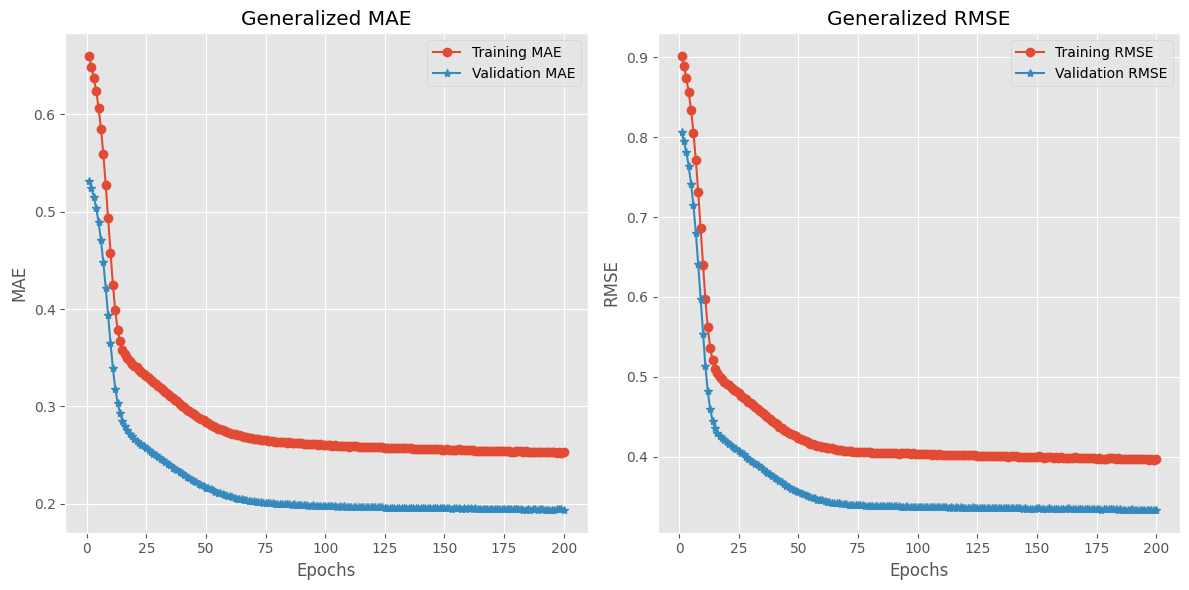

In [6]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break

In [ ]:
# np.mean(list(abs_patients_errors_PHs[6].values()))

9.557476889981624

In [7]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = patient_mae
    mean_ph.append(np.mean(list(patient_mae.values())))
    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break
abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,6
559,11.065909
563,14.306160
570,9.934023
575,13.996613
588,14.646061
591,15.468822
540,13.190348
544,12.263631
552,12.610369
567,15.084747


In [8]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph2 = []

for i, patient_rmse in enumerate(squared_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    mean_ph2.append(np.mean(list(patient_rmse.values())))
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph2
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,6
559,15.974250
563,20.450988
570,14.823445
575,22.121637
588,19.845834
591,22.011500
540,18.048888
544,17.916819
552,17.606208
567,22.201863


In [16]:
model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
model_all_train_read.load_state_dict(torch.load('saved_models\model_shared-layer_attention_6.pth'))
model_all_train_read.to(device)
model_all_train_read.eval()


C:\Users\menna\AppData\Local\Temp\ipykernel_14112\2291275183.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_all_train_read.load_state_dict(torch.load('saved_model

SharedLayerModelWithAttention(
  (conv_layers): ModuleList(
    (0-11): 12 x Conv1d(1, 64, kernel_size=(4,), stride=(2,), padding=(1,), dilation=(2,))
  )
  (shared_lstm): GRU(64, 128, batch_first=True)
  (attention): ModuleList(
    (0-11): 12 x Linear(in_features=128, out_features=1, bias=True)
  )
  (personalized_fc): ModuleList(
    (0-11): 12 x Linear(in_features=128, out_features=64, bias=True)
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (output_layer): Linear(in_features=768, out_features=12, bias=True)
)

In [75]:
# df = pd.read_csv("data\\ohio-data\\processed\\2018\\test\\559_testing.csv")
# # df['value']
# X, y = prepare_time_series_data(df, 'value', window_size, prediction_horizon)

In [76]:
# plt.figure(figsize=(13,5))
# plt.plot(np.arange(len(df['value'])), df['value'])

In [17]:
_, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
                                                                                    window_size,BATCH_SIZE, prediction_horizon = 6,
                                                                                    model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)


Shape of X (features): (12, 13618, 6)
Shape of y (targets): (12, 13618)
Shape of X_test (features): (12, 3939, 6)
Shape of y_test (targets): (12, 3939)


In [18]:
# outputs = []
# targets = []
# with torch.no_grad():  # Disable gradient calculation for evaluation
#     for inputs, target in test_loader:
#         # Move data to device (GPU or CPU) 
#         inputs = [inp for inp in inputs]
#         # inputs = torch.tensor(np.array(inputs)).to(device)
#         inputs = torch.tensor(np.array(inputs))

#         # target = target.to(device)
#         # print(targets[0])
#         # print(targets)
#         # Forward pass
#         output = model_all_train_read(inputs)
#         outputs.append(output)
#         targets.append(target)

In [19]:
outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)

In [20]:
outputs = torch.cat(outputs_all_batches, dim=0)
targets = torch.cat(targets_all_batches, dim=0)

outputs = outputs.cpu()
targets = targets.cpu()
# Create a mask where arr1 equals 0


In [21]:
mask = (targets == 0.0)

# Set elements to None (or np.nan for float compatibility)
targets = np.where(mask, None, targets)
outputs = np.where(mask, None, outputs)

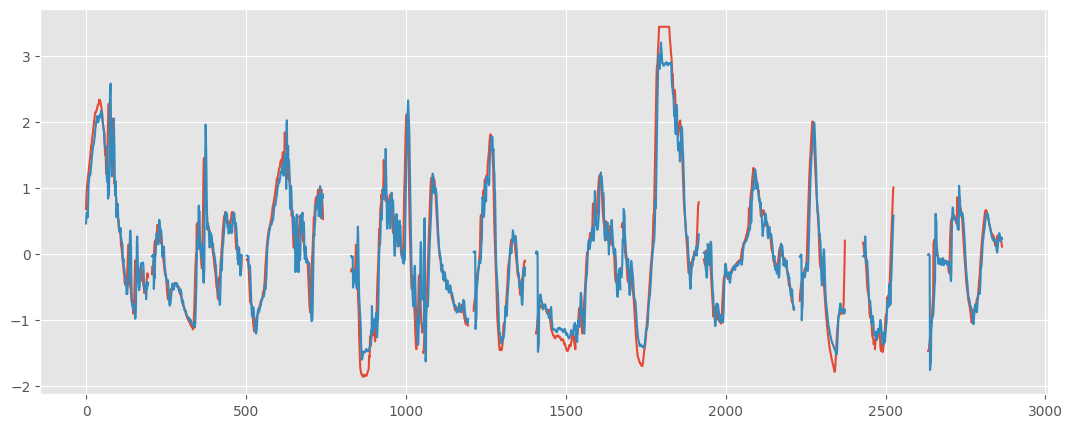

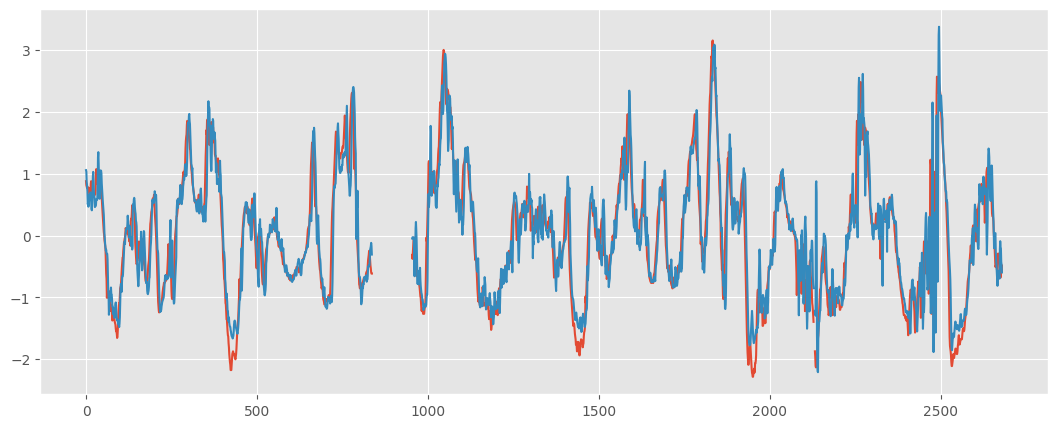

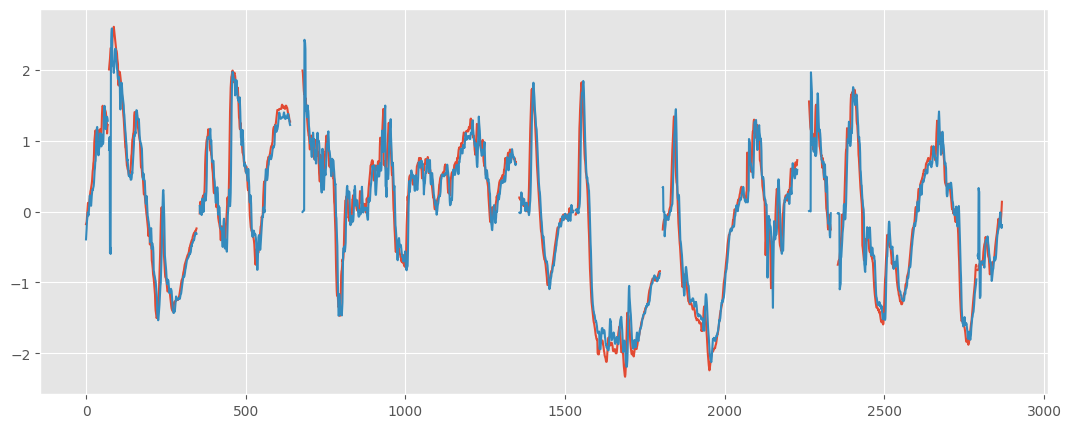

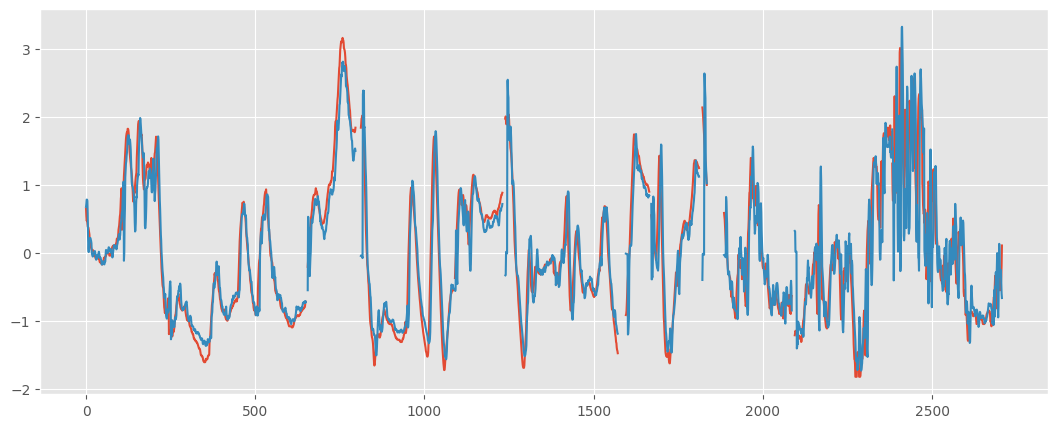

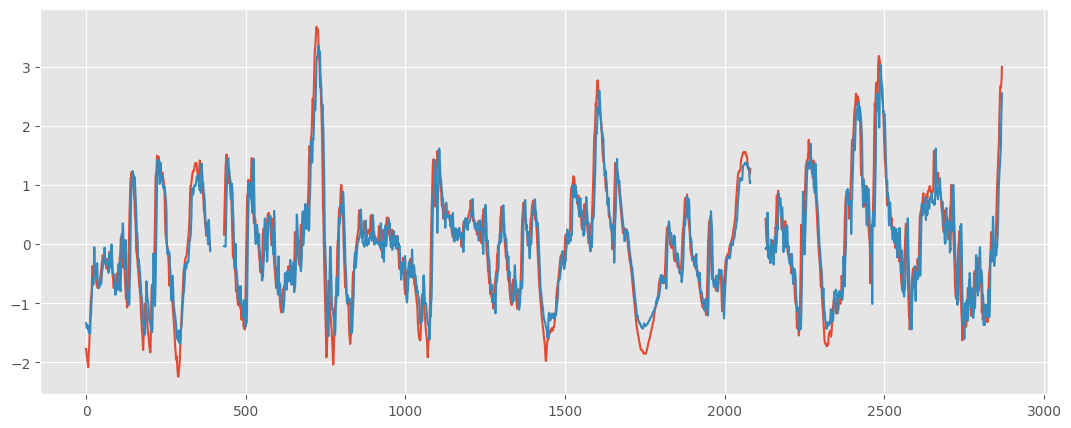

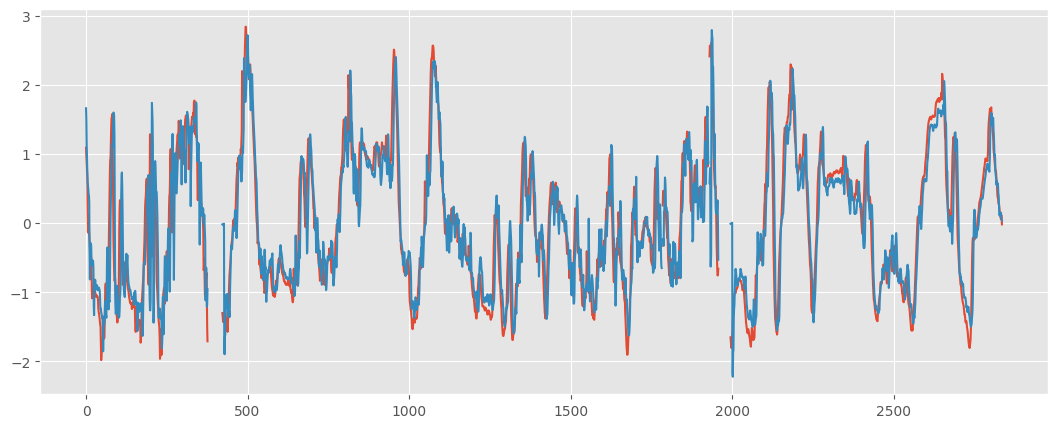

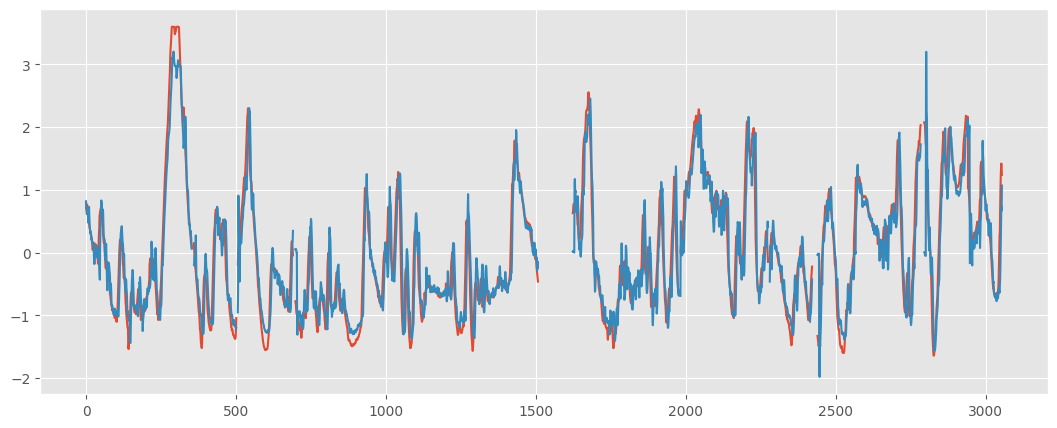

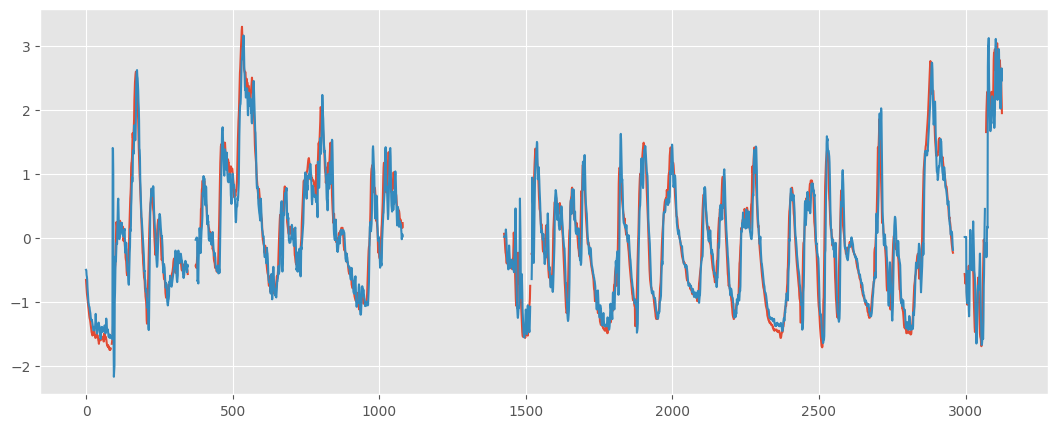

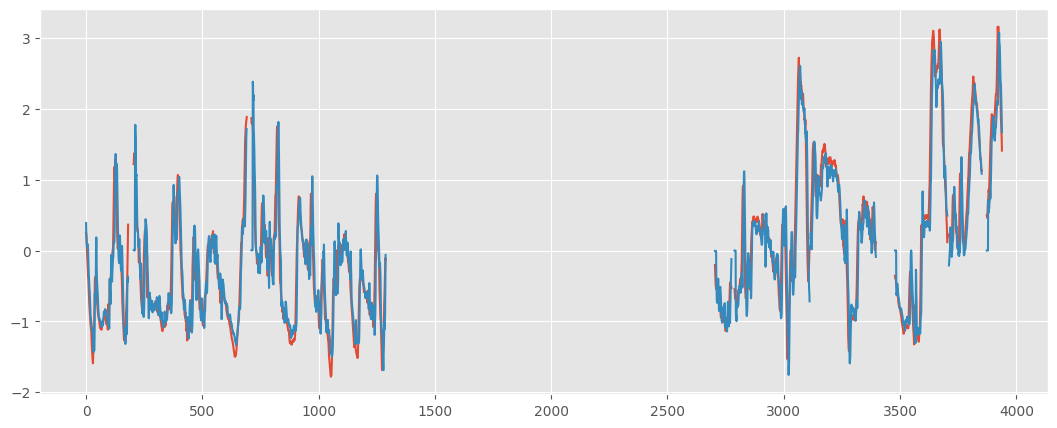

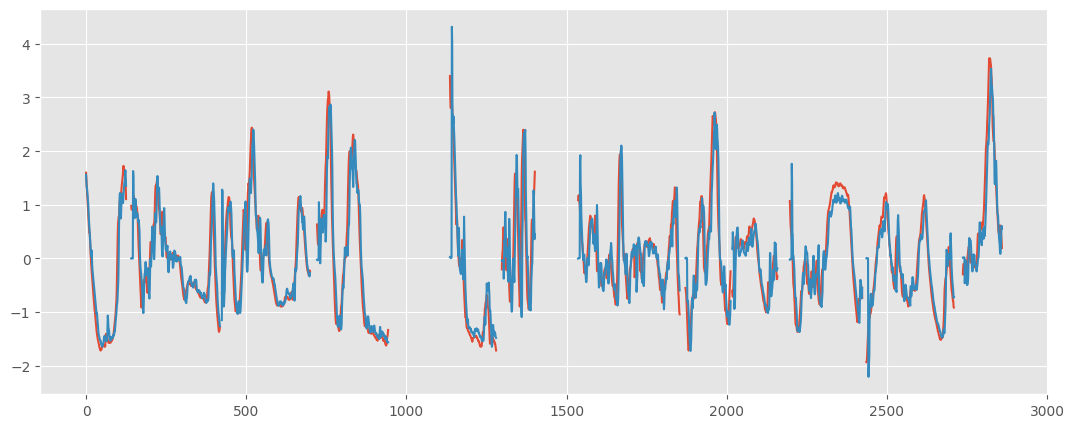

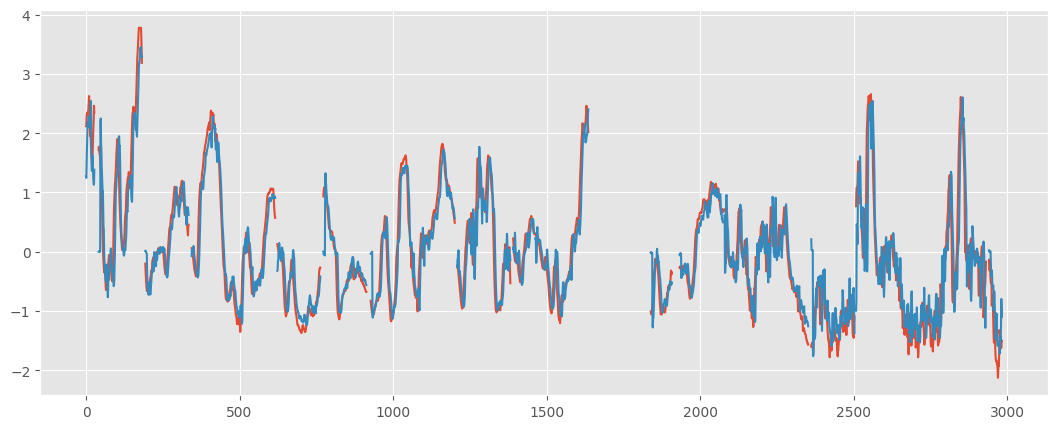

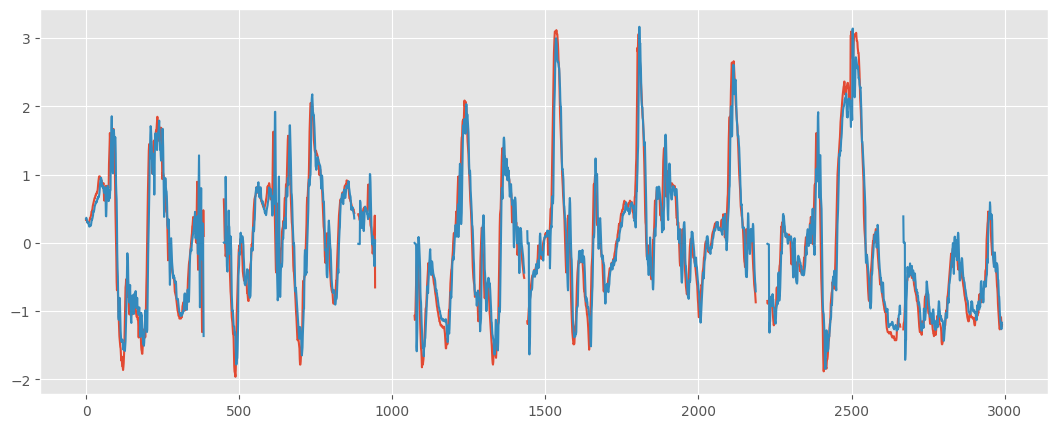

In [22]:
# index =4
for index in range(12):
    patient1_target = [sublist[index] for sublist in targets]
    patient1_output = [sublist[index]  for sublist in outputs]
    # patient1_output = outputs_all_batches[index]
    # patient1_target = targets_all_batches[index]

    # print(list(abs_patients_errors_PHs[6].values())[index])
    # print(list(squared_patients_errors_PHs[6].values())[index])

    plt.figure(figsize=(13,5))
    plt.plot(patient1_target)
    plt.plot(patient1_output)
    plt.show()

In [280]:
mae, rmse, each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, 

In [ ]:
squared_patients_errors_PHs_df = pd.DataFrame()
for i, patient_rmse in enumerate(squared_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = list(RMSE_Patients_PHs.values())
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

In [247]:
# test_list = [(patient1_target[i] - patient1_output[i])**2 if type(patient1_target[i]) != type(None) else None for i in range(len(patient1_target))]
# filtered_data = [x for x in test_list if x is not None]
# np.sqrt(np.mean(filtered_data))

In [20]:
summary(model, input_size=[(64, 1), (64, 1)])

Shape before output layer: torch.Size([2, 128])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 30]             320
               GRU-2  [[-1, 30, 128], [-1, 2, 128]]               0
            Conv1d-3               [-1, 64, 30]             320
               GRU-4  [[-1, 30, 128], [-1, 2, 128]]               0
            Linear-5                   [-1, 64]           8,256
           Dropout-6                   [-1, 64]               0
            Linear-7                   [-1, 64]           8,256
           Dropout-8                   [-1, 64]               0
            Linear-9                   [-1, 12]           1,548
Total params: 18,700
Trainable params: 18,700
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 14.97
Params size (MB): 0.07
Estimated Total Size

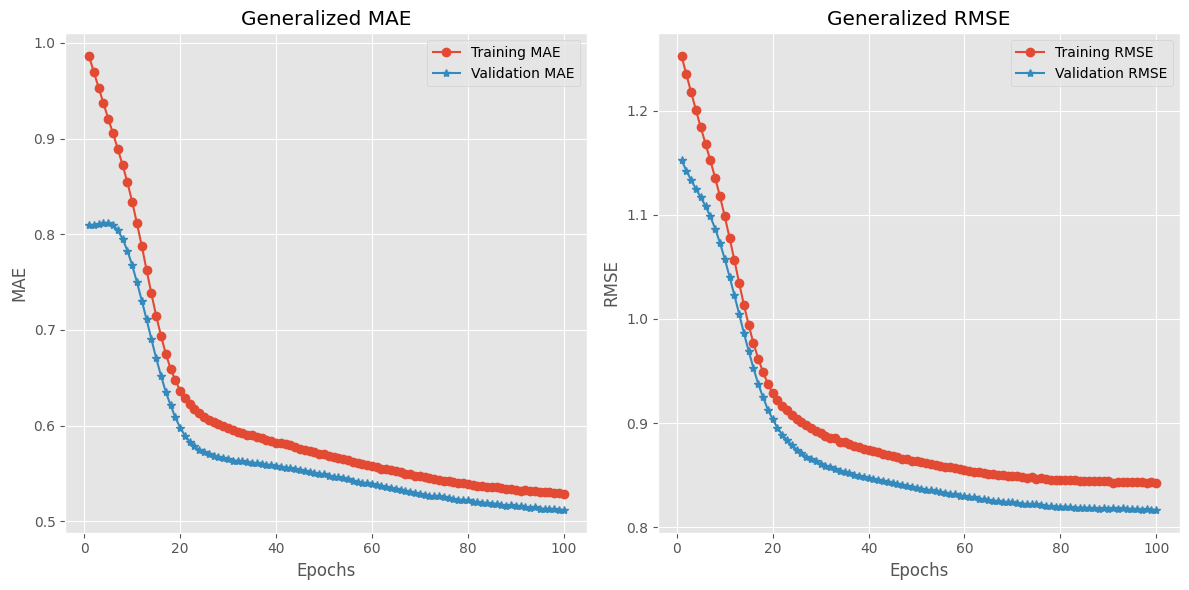

In [10]:
plot_loss_curves(history)

In [12]:
model_all_train = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
model_all_train = model_all_train.to(device)
model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=100, learning_rate=0.00001, model_type = 'shared-layer')

Epoch 1/100: 100%|██████████| 213/213 [00:11<00:00, 18.93batch/s, mae_loss=0.873]


Epoch [1/100], Training MAE: 0.9355, Training RMSE: 1.2276
Epoch [1/100], Validation MAE: 0.7535, Validation RMSE: 1.0902


Epoch 2/100: 100%|██████████| 213/213 [00:11<00:00, 18.22batch/s, mae_loss=0.908]


Epoch [2/100], Training MAE: 0.9187, Training RMSE: 1.2079
Epoch [2/100], Validation MAE: 0.7512, Validation RMSE: 1.0770


Epoch 3/100: 100%|██████████| 213/213 [00:12<00:00, 17.67batch/s, mae_loss=0.905]


Epoch [3/100], Training MAE: 0.9019, Training RMSE: 1.1885
Epoch [3/100], Validation MAE: 0.7469, Validation RMSE: 1.0636


Epoch 4/100: 100%|██████████| 213/213 [00:11<00:00, 18.14batch/s, mae_loss=0.879]


Epoch [4/100], Training MAE: 0.8839, Training RMSE: 1.1679
Epoch [4/100], Validation MAE: 0.7402, Validation RMSE: 1.0491


Epoch 5/100: 100%|██████████| 213/213 [00:11<00:00, 18.16batch/s, mae_loss=0.83] 


Epoch [5/100], Training MAE: 0.8637, Training RMSE: 1.1460
Epoch [5/100], Validation MAE: 0.7284, Validation RMSE: 1.0323


Epoch 6/100: 100%|██████████| 213/213 [00:11<00:00, 18.74batch/s, mae_loss=0.875]


Epoch [6/100], Training MAE: 0.8405, Training RMSE: 1.1222
Epoch [6/100], Validation MAE: 0.7098, Validation RMSE: 1.0114


Epoch 7/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.788]


Epoch [7/100], Training MAE: 0.8129, Training RMSE: 1.0947
Epoch [7/100], Validation MAE: 0.6860, Validation RMSE: 0.9871


Epoch 8/100: 100%|██████████| 213/213 [00:11<00:00, 18.25batch/s, mae_loss=0.759]


Epoch [8/100], Training MAE: 0.7805, Training RMSE: 1.0640
Epoch [8/100], Validation MAE: 0.6578, Validation RMSE: 0.9600


Epoch 9/100: 100%|██████████| 213/213 [00:11<00:00, 18.49batch/s, mae_loss=0.727]


Epoch [9/100], Training MAE: 0.7453, Training RMSE: 1.0321
Epoch [9/100], Validation MAE: 0.6258, Validation RMSE: 0.9309


Epoch 10/100: 100%|██████████| 213/213 [00:13<00:00, 15.51batch/s, mae_loss=0.682]


Epoch [10/100], Training MAE: 0.7094, Training RMSE: 1.0009
Epoch [10/100], Validation MAE: 0.5958, Validation RMSE: 0.9043


Epoch 11/100: 100%|██████████| 213/213 [00:11<00:00, 18.52batch/s, mae_loss=0.68] 


Epoch [11/100], Training MAE: 0.6759, Training RMSE: 0.9721
Epoch [11/100], Validation MAE: 0.5681, Validation RMSE: 0.8806


Epoch 12/100: 100%|██████████| 213/213 [00:11<00:00, 18.93batch/s, mae_loss=0.588]


Epoch [12/100], Training MAE: 0.6482, Training RMSE: 0.9495
Epoch [12/100], Validation MAE: 0.5465, Validation RMSE: 0.8625


Epoch 13/100: 100%|██████████| 213/213 [00:11<00:00, 17.78batch/s, mae_loss=0.588]


Epoch [13/100], Training MAE: 0.6258, Training RMSE: 0.9308
Epoch [13/100], Validation MAE: 0.5293, Validation RMSE: 0.8488


Epoch 14/100: 100%|██████████| 213/213 [00:10<00:00, 19.65batch/s, mae_loss=0.608]


Epoch [14/100], Training MAE: 0.6113, Training RMSE: 0.9190
Epoch [14/100], Validation MAE: 0.5179, Validation RMSE: 0.8400


Epoch 15/100: 100%|██████████| 213/213 [00:11<00:00, 18.89batch/s, mae_loss=0.614]


Epoch [15/100], Training MAE: 0.6007, Training RMSE: 0.9097
Epoch [15/100], Validation MAE: 0.5091, Validation RMSE: 0.8324


Epoch 16/100: 100%|██████████| 213/213 [00:11<00:00, 18.89batch/s, mae_loss=0.632]


Epoch [16/100], Training MAE: 0.5940, Training RMSE: 0.9036
Epoch [16/100], Validation MAE: 0.5047, Validation RMSE: 0.8284


Epoch 17/100: 100%|██████████| 213/213 [00:11<00:00, 18.14batch/s, mae_loss=0.547]


Epoch [17/100], Training MAE: 0.5895, Training RMSE: 0.8999
Epoch [17/100], Validation MAE: 0.5007, Validation RMSE: 0.8245


Epoch 18/100: 100%|██████████| 213/213 [00:11<00:00, 18.23batch/s, mae_loss=0.608]


Epoch [18/100], Training MAE: 0.5859, Training RMSE: 0.8966
Epoch [18/100], Validation MAE: 0.4982, Validation RMSE: 0.8211


Epoch 19/100: 100%|██████████| 213/213 [00:10<00:00, 19.39batch/s, mae_loss=0.576]


Epoch [19/100], Training MAE: 0.5833, Training RMSE: 0.8938
Epoch [19/100], Validation MAE: 0.4963, Validation RMSE: 0.8195


Epoch 20/100: 100%|██████████| 213/213 [00:10<00:00, 19.48batch/s, mae_loss=0.61] 


Epoch [20/100], Training MAE: 0.5811, Training RMSE: 0.8919
Epoch [20/100], Validation MAE: 0.4950, Validation RMSE: 0.8171


Epoch 21/100: 100%|██████████| 213/213 [00:10<00:00, 19.75batch/s, mae_loss=0.549]


Epoch [21/100], Training MAE: 0.5784, Training RMSE: 0.8888
Epoch [21/100], Validation MAE: 0.4932, Validation RMSE: 0.8149


Epoch 22/100: 100%|██████████| 213/213 [00:11<00:00, 19.18batch/s, mae_loss=0.576]


Epoch [22/100], Training MAE: 0.5772, Training RMSE: 0.8876
Epoch [22/100], Validation MAE: 0.4917, Validation RMSE: 0.8141


Epoch 23/100: 100%|██████████| 213/213 [00:11<00:00, 18.69batch/s, mae_loss=0.525]


Epoch [23/100], Training MAE: 0.5747, Training RMSE: 0.8859
Epoch [23/100], Validation MAE: 0.4911, Validation RMSE: 0.8137


Epoch 24/100: 100%|██████████| 213/213 [00:11<00:00, 17.77batch/s, mae_loss=0.543]


Epoch [24/100], Training MAE: 0.5732, Training RMSE: 0.8849
Epoch [24/100], Validation MAE: 0.4888, Validation RMSE: 0.8111


Epoch 25/100: 100%|██████████| 213/213 [00:11<00:00, 18.85batch/s, mae_loss=0.561]


Epoch [25/100], Training MAE: 0.5723, Training RMSE: 0.8840
Epoch [25/100], Validation MAE: 0.4880, Validation RMSE: 0.8106


Epoch 26/100: 100%|██████████| 213/213 [00:11<00:00, 18.48batch/s, mae_loss=0.609]


Epoch [26/100], Training MAE: 0.5704, Training RMSE: 0.8824
Epoch [26/100], Validation MAE: 0.4863, Validation RMSE: 0.8094


Epoch 27/100: 100%|██████████| 213/213 [00:11<00:00, 19.19batch/s, mae_loss=0.574]


Epoch [27/100], Training MAE: 0.5686, Training RMSE: 0.8810
Epoch [27/100], Validation MAE: 0.4852, Validation RMSE: 0.8080


Epoch 28/100: 100%|██████████| 213/213 [00:12<00:00, 17.70batch/s, mae_loss=0.584]


Epoch [28/100], Training MAE: 0.5659, Training RMSE: 0.8783
Epoch [28/100], Validation MAE: 0.4825, Validation RMSE: 0.8064


Epoch 29/100: 100%|██████████| 213/213 [00:11<00:00, 18.81batch/s, mae_loss=0.599]


Epoch [29/100], Training MAE: 0.5654, Training RMSE: 0.8787
Epoch [29/100], Validation MAE: 0.4820, Validation RMSE: 0.8064


Epoch 30/100: 100%|██████████| 213/213 [00:11<00:00, 18.84batch/s, mae_loss=0.532]


Epoch [30/100], Training MAE: 0.5634, Training RMSE: 0.8772
Epoch [30/100], Validation MAE: 0.4816, Validation RMSE: 0.8057


Epoch 31/100: 100%|██████████| 213/213 [00:11<00:00, 18.78batch/s, mae_loss=0.608]


Epoch [31/100], Training MAE: 0.5615, Training RMSE: 0.8753
Epoch [31/100], Validation MAE: 0.4796, Validation RMSE: 0.8042


Epoch 32/100: 100%|██████████| 213/213 [00:10<00:00, 19.57batch/s, mae_loss=0.61] 


Epoch [32/100], Training MAE: 0.5601, Training RMSE: 0.8746
Epoch [32/100], Validation MAE: 0.4779, Validation RMSE: 0.8024


Epoch 33/100: 100%|██████████| 213/213 [00:11<00:00, 18.29batch/s, mae_loss=0.572]


Epoch [33/100], Training MAE: 0.5585, Training RMSE: 0.8737
Epoch [33/100], Validation MAE: 0.4777, Validation RMSE: 0.8023


Epoch 34/100: 100%|██████████| 213/213 [00:10<00:00, 19.43batch/s, mae_loss=0.515]


Epoch [34/100], Training MAE: 0.5571, Training RMSE: 0.8728
Epoch [34/100], Validation MAE: 0.4759, Validation RMSE: 0.8011


Epoch 35/100: 100%|██████████| 213/213 [00:11<00:00, 18.99batch/s, mae_loss=0.564]


Epoch [35/100], Training MAE: 0.5559, Training RMSE: 0.8717
Epoch [35/100], Validation MAE: 0.4749, Validation RMSE: 0.8008


Epoch 36/100: 100%|██████████| 213/213 [00:10<00:00, 19.64batch/s, mae_loss=0.554]


Epoch [36/100], Training MAE: 0.5539, Training RMSE: 0.8706
Epoch [36/100], Validation MAE: 0.4734, Validation RMSE: 0.7994


Epoch 37/100: 100%|██████████| 213/213 [00:11<00:00, 19.24batch/s, mae_loss=0.57] 


Epoch [37/100], Training MAE: 0.5518, Training RMSE: 0.8695
Epoch [37/100], Validation MAE: 0.4706, Validation RMSE: 0.7971


Epoch 38/100: 100%|██████████| 213/213 [00:11<00:00, 18.55batch/s, mae_loss=0.554]


Epoch [38/100], Training MAE: 0.5502, Training RMSE: 0.8679
Epoch [38/100], Validation MAE: 0.4690, Validation RMSE: 0.7967


Epoch 39/100: 100%|██████████| 213/213 [00:11<00:00, 19.10batch/s, mae_loss=0.533]


Epoch [39/100], Training MAE: 0.5492, Training RMSE: 0.8676
Epoch [39/100], Validation MAE: 0.4687, Validation RMSE: 0.7957


Epoch 40/100: 100%|██████████| 213/213 [00:10<00:00, 19.63batch/s, mae_loss=0.524]


Epoch [40/100], Training MAE: 0.5470, Training RMSE: 0.8660
Epoch [40/100], Validation MAE: 0.4681, Validation RMSE: 0.7959


Epoch 41/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.514]


Epoch [41/100], Training MAE: 0.5453, Training RMSE: 0.8650
Epoch [41/100], Validation MAE: 0.4654, Validation RMSE: 0.7935


Epoch 42/100: 100%|██████████| 213/213 [00:11<00:00, 19.14batch/s, mae_loss=0.539]


Epoch [42/100], Training MAE: 0.5445, Training RMSE: 0.8644
Epoch [42/100], Validation MAE: 0.4645, Validation RMSE: 0.7936


Epoch 43/100: 100%|██████████| 213/213 [00:11<00:00, 18.40batch/s, mae_loss=0.528]


Epoch [43/100], Training MAE: 0.5423, Training RMSE: 0.8635
Epoch [43/100], Validation MAE: 0.4629, Validation RMSE: 0.7923


Epoch 44/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.593]


Epoch [44/100], Training MAE: 0.5412, Training RMSE: 0.8630
Epoch [44/100], Validation MAE: 0.4620, Validation RMSE: 0.7926


Epoch 45/100: 100%|██████████| 213/213 [00:10<00:00, 19.62batch/s, mae_loss=0.499]


Epoch [45/100], Training MAE: 0.5396, Training RMSE: 0.8616
Epoch [45/100], Validation MAE: 0.4600, Validation RMSE: 0.7903


Epoch 46/100: 100%|██████████| 213/213 [00:11<00:00, 19.20batch/s, mae_loss=0.538]


Epoch [46/100], Training MAE: 0.5379, Training RMSE: 0.8606
Epoch [46/100], Validation MAE: 0.4591, Validation RMSE: 0.7907


Epoch 47/100: 100%|██████████| 213/213 [00:11<00:00, 18.86batch/s, mae_loss=0.576]


Epoch [47/100], Training MAE: 0.5366, Training RMSE: 0.8599
Epoch [47/100], Validation MAE: 0.4572, Validation RMSE: 0.7891


Epoch 48/100: 100%|██████████| 213/213 [00:11<00:00, 18.19batch/s, mae_loss=0.499]


Epoch [48/100], Training MAE: 0.5347, Training RMSE: 0.8596
Epoch [48/100], Validation MAE: 0.4566, Validation RMSE: 0.7891


Epoch 49/100: 100%|██████████| 213/213 [00:10<00:00, 19.57batch/s, mae_loss=0.538]


Epoch [49/100], Training MAE: 0.5333, Training RMSE: 0.8583
Epoch [49/100], Validation MAE: 0.4551, Validation RMSE: 0.7884


Epoch 50/100: 100%|██████████| 213/213 [00:11<00:00, 19.02batch/s, mae_loss=0.524]


Epoch [50/100], Training MAE: 0.5324, Training RMSE: 0.8580
Epoch [50/100], Validation MAE: 0.4535, Validation RMSE: 0.7870


Epoch 51/100: 100%|██████████| 213/213 [00:10<00:00, 19.38batch/s, mae_loss=0.513]


Epoch [51/100], Training MAE: 0.5302, Training RMSE: 0.8570
Epoch [51/100], Validation MAE: 0.4524, Validation RMSE: 0.7861


Epoch 52/100: 100%|██████████| 213/213 [00:11<00:00, 19.21batch/s, mae_loss=0.553]


Epoch [52/100], Training MAE: 0.5295, Training RMSE: 0.8572
Epoch [52/100], Validation MAE: 0.4514, Validation RMSE: 0.7858


Epoch 53/100: 100%|██████████| 213/213 [00:11<00:00, 18.80batch/s, mae_loss=0.593]


Epoch [53/100], Training MAE: 0.5275, Training RMSE: 0.8555
Epoch [53/100], Validation MAE: 0.4500, Validation RMSE: 0.7853


Epoch 54/100: 100%|██████████| 213/213 [00:11<00:00, 19.16batch/s, mae_loss=0.578]


Epoch [54/100], Training MAE: 0.5271, Training RMSE: 0.8558
Epoch [54/100], Validation MAE: 0.4489, Validation RMSE: 0.7848


Epoch 55/100: 100%|██████████| 213/213 [00:10<00:00, 19.64batch/s, mae_loss=0.533]


Epoch [55/100], Training MAE: 0.5254, Training RMSE: 0.8547
Epoch [55/100], Validation MAE: 0.4475, Validation RMSE: 0.7842


Epoch 56/100: 100%|██████████| 213/213 [00:11<00:00, 19.19batch/s, mae_loss=0.558]


Epoch [56/100], Training MAE: 0.5241, Training RMSE: 0.8546
Epoch [56/100], Validation MAE: 0.4464, Validation RMSE: 0.7850


Epoch 57/100: 100%|██████████| 213/213 [00:10<00:00, 19.69batch/s, mae_loss=0.517]


Epoch [57/100], Training MAE: 0.5236, Training RMSE: 0.8549
Epoch [57/100], Validation MAE: 0.4454, Validation RMSE: 0.7833


Epoch 58/100: 100%|██████████| 213/213 [00:11<00:00, 17.94batch/s, mae_loss=0.546]


Epoch [58/100], Training MAE: 0.5219, Training RMSE: 0.8539
Epoch [58/100], Validation MAE: 0.4440, Validation RMSE: 0.7824


Epoch 59/100: 100%|██████████| 213/213 [00:11<00:00, 19.08batch/s, mae_loss=0.533]


Epoch [59/100], Training MAE: 0.5212, Training RMSE: 0.8542
Epoch [59/100], Validation MAE: 0.4437, Validation RMSE: 0.7829


Epoch 60/100: 100%|██████████| 213/213 [00:10<00:00, 19.40batch/s, mae_loss=0.5]  


Epoch [60/100], Training MAE: 0.5203, Training RMSE: 0.8528
Epoch [60/100], Validation MAE: 0.4423, Validation RMSE: 0.7821


Epoch 61/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.503]


Epoch [61/100], Training MAE: 0.5196, Training RMSE: 0.8530
Epoch [61/100], Validation MAE: 0.4415, Validation RMSE: 0.7818


Epoch 62/100: 100%|██████████| 213/213 [00:10<00:00, 19.58batch/s, mae_loss=0.487]


Epoch [62/100], Training MAE: 0.5191, Training RMSE: 0.8531
Epoch [62/100], Validation MAE: 0.4408, Validation RMSE: 0.7809


Epoch 63/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.567]


Epoch [63/100], Training MAE: 0.5182, Training RMSE: 0.8529
Epoch [63/100], Validation MAE: 0.4402, Validation RMSE: 0.7814


Epoch 64/100: 100%|██████████| 213/213 [00:10<00:00, 19.70batch/s, mae_loss=0.543]


Epoch [64/100], Training MAE: 0.5167, Training RMSE: 0.8517
Epoch [64/100], Validation MAE: 0.4396, Validation RMSE: 0.7814


Epoch 65/100: 100%|██████████| 213/213 [00:11<00:00, 19.12batch/s, mae_loss=0.526]


Epoch [65/100], Training MAE: 0.5162, Training RMSE: 0.8523
Epoch [65/100], Validation MAE: 0.4385, Validation RMSE: 0.7804


Epoch 66/100: 100%|██████████| 213/213 [00:10<00:00, 19.41batch/s, mae_loss=0.501]


Epoch [66/100], Training MAE: 0.5160, Training RMSE: 0.8523
Epoch [66/100], Validation MAE: 0.4380, Validation RMSE: 0.7814


Epoch 67/100: 100%|██████████| 213/213 [00:11<00:00, 19.32batch/s, mae_loss=0.429]


Epoch [67/100], Training MAE: 0.5154, Training RMSE: 0.8524
Epoch [67/100], Validation MAE: 0.4375, Validation RMSE: 0.7807


Epoch 68/100: 100%|██████████| 213/213 [00:11<00:00, 18.87batch/s, mae_loss=0.523]


Epoch [68/100], Training MAE: 0.5147, Training RMSE: 0.8516
Epoch [68/100], Validation MAE: 0.4359, Validation RMSE: 0.7796


Epoch 69/100: 100%|██████████| 213/213 [00:11<00:00, 19.17batch/s, mae_loss=0.492]


Epoch [69/100], Training MAE: 0.5140, Training RMSE: 0.8521
Epoch [69/100], Validation MAE: 0.4352, Validation RMSE: 0.7798


Epoch 70/100: 100%|██████████| 213/213 [00:10<00:00, 19.60batch/s, mae_loss=0.544]


Epoch [70/100], Training MAE: 0.5135, Training RMSE: 0.8515
Epoch [70/100], Validation MAE: 0.4344, Validation RMSE: 0.7797


Epoch 71/100: 100%|██████████| 213/213 [00:12<00:00, 16.42batch/s, mae_loss=0.506]


Epoch [71/100], Training MAE: 0.5131, Training RMSE: 0.8517
Epoch [71/100], Validation MAE: 0.4340, Validation RMSE: 0.7786


Epoch 72/100: 100%|██████████| 213/213 [00:11<00:00, 18.59batch/s, mae_loss=0.524]


Epoch [72/100], Training MAE: 0.5127, Training RMSE: 0.8520
Epoch [72/100], Validation MAE: 0.4337, Validation RMSE: 0.7793


Epoch 73/100: 100%|██████████| 213/213 [00:12<00:00, 17.44batch/s, mae_loss=0.523]


Epoch [73/100], Training MAE: 0.5120, Training RMSE: 0.8516
Epoch [73/100], Validation MAE: 0.4338, Validation RMSE: 0.7797


Epoch 74/100: 100%|██████████| 213/213 [00:11<00:00, 18.42batch/s, mae_loss=0.471]


Epoch [74/100], Training MAE: 0.5119, Training RMSE: 0.8519
Epoch [74/100], Validation MAE: 0.4329, Validation RMSE: 0.7794


Epoch 75/100: 100%|██████████| 213/213 [00:11<00:00, 18.83batch/s, mae_loss=0.496]


Epoch [75/100], Training MAE: 0.5113, Training RMSE: 0.8518
Epoch [75/100], Validation MAE: 0.4323, Validation RMSE: 0.7795


Epoch 76/100: 100%|██████████| 213/213 [00:13<00:00, 15.71batch/s, mae_loss=0.486]


Epoch [76/100], Training MAE: 0.5112, Training RMSE: 0.8517
Epoch [76/100], Validation MAE: 0.4320, Validation RMSE: 0.7798


Epoch 77/100: 100%|██████████| 213/213 [00:13<00:00, 15.59batch/s, mae_loss=0.604]


Epoch [77/100], Training MAE: 0.5107, Training RMSE: 0.8519
Epoch [77/100], Validation MAE: 0.4321, Validation RMSE: 0.7787


Epoch 78/100: 100%|██████████| 213/213 [00:12<00:00, 16.62batch/s, mae_loss=0.473]


Epoch [78/100], Training MAE: 0.5100, Training RMSE: 0.8507
Epoch [78/100], Validation MAE: 0.4307, Validation RMSE: 0.7786


Epoch 79/100: 100%|██████████| 213/213 [00:11<00:00, 18.55batch/s, mae_loss=0.552]


Epoch [79/100], Training MAE: 0.5100, Training RMSE: 0.8518
Epoch [79/100], Validation MAE: 0.4304, Validation RMSE: 0.7788


Epoch 80/100: 100%|██████████| 213/213 [00:11<00:00, 18.22batch/s, mae_loss=0.562]


Epoch [80/100], Training MAE: 0.5099, Training RMSE: 0.8520
Epoch [80/100], Validation MAE: 0.4302, Validation RMSE: 0.7789


Epoch 81/100: 100%|██████████| 213/213 [00:11<00:00, 18.61batch/s, mae_loss=0.56] 


Epoch [81/100], Training MAE: 0.5099, Training RMSE: 0.8515
Epoch [81/100], Validation MAE: 0.4301, Validation RMSE: 0.7793


Epoch 82/100: 100%|██████████| 213/213 [00:11<00:00, 18.40batch/s, mae_loss=0.519]


Epoch [82/100], Training MAE: 0.5090, Training RMSE: 0.8512
Epoch [82/100], Validation MAE: 0.4299, Validation RMSE: 0.7796


Epoch 83/100: 100%|██████████| 213/213 [00:11<00:00, 18.06batch/s, mae_loss=0.504]


Epoch [83/100], Training MAE: 0.5090, Training RMSE: 0.8520
Epoch [83/100], Validation MAE: 0.4288, Validation RMSE: 0.7779


Epoch 84/100: 100%|██████████| 213/213 [00:11<00:00, 18.09batch/s, mae_loss=0.497]


Epoch [84/100], Training MAE: 0.5087, Training RMSE: 0.8515
Epoch [84/100], Validation MAE: 0.4285, Validation RMSE: 0.7780


Epoch 85/100: 100%|██████████| 213/213 [00:11<00:00, 17.93batch/s, mae_loss=0.533]


Epoch [85/100], Training MAE: 0.5085, Training RMSE: 0.8516
Epoch [85/100], Validation MAE: 0.4291, Validation RMSE: 0.7783


Epoch 86/100: 100%|██████████| 213/213 [00:11<00:00, 18.63batch/s, mae_loss=0.523]


Epoch [86/100], Training MAE: 0.5081, Training RMSE: 0.8512
Epoch [86/100], Validation MAE: 0.4291, Validation RMSE: 0.7792


Epoch 87/100: 100%|██████████| 213/213 [00:11<00:00, 17.94batch/s, mae_loss=0.492]


Epoch [87/100], Training MAE: 0.5081, Training RMSE: 0.8513
Epoch [87/100], Validation MAE: 0.4287, Validation RMSE: 0.7785


Epoch 88/100: 100%|██████████| 213/213 [00:11<00:00, 18.65batch/s, mae_loss=0.474]


Epoch [88/100], Training MAE: 0.5081, Training RMSE: 0.8512
Epoch [88/100], Validation MAE: 0.4283, Validation RMSE: 0.7792


Epoch 89/100: 100%|██████████| 213/213 [00:11<00:00, 18.19batch/s, mae_loss=0.496]


Epoch [89/100], Training MAE: 0.5074, Training RMSE: 0.8516
Epoch [89/100], Validation MAE: 0.4282, Validation RMSE: 0.7783


Epoch 90/100: 100%|██████████| 213/213 [00:11<00:00, 18.48batch/s, mae_loss=0.472]


Epoch [90/100], Training MAE: 0.5075, Training RMSE: 0.8511
Epoch [90/100], Validation MAE: 0.4286, Validation RMSE: 0.7787


Epoch 91/100: 100%|██████████| 213/213 [00:11<00:00, 18.11batch/s, mae_loss=0.549]


Epoch [91/100], Training MAE: 0.5070, Training RMSE: 0.8507
Epoch [91/100], Validation MAE: 0.4276, Validation RMSE: 0.7777


Epoch 92/100: 100%|██████████| 213/213 [00:11<00:00, 17.82batch/s, mae_loss=0.474]


Epoch [92/100], Training MAE: 0.5070, Training RMSE: 0.8512
Epoch [92/100], Validation MAE: 0.4277, Validation RMSE: 0.7781


Epoch 93/100: 100%|██████████| 213/213 [00:11<00:00, 18.28batch/s, mae_loss=0.488]


Epoch [93/100], Training MAE: 0.5068, Training RMSE: 0.8507
Epoch [93/100], Validation MAE: 0.4275, Validation RMSE: 0.7786


Epoch 94/100: 100%|██████████| 213/213 [00:11<00:00, 18.52batch/s, mae_loss=0.497]


Epoch [94/100], Training MAE: 0.5067, Training RMSE: 0.8509
Epoch [94/100], Validation MAE: 0.4280, Validation RMSE: 0.7790


Epoch 95/100: 100%|██████████| 213/213 [00:11<00:00, 18.09batch/s, mae_loss=0.492]


Epoch [95/100], Training MAE: 0.5062, Training RMSE: 0.8510
Epoch [95/100], Validation MAE: 0.4272, Validation RMSE: 0.7791


Epoch 96/100: 100%|██████████| 213/213 [00:11<00:00, 18.77batch/s, mae_loss=0.449]


Epoch [96/100], Training MAE: 0.5061, Training RMSE: 0.8509
Epoch [96/100], Validation MAE: 0.4266, Validation RMSE: 0.7778


Epoch 97/100: 100%|██████████| 213/213 [00:12<00:00, 17.34batch/s, mae_loss=0.456]


Epoch [97/100], Training MAE: 0.5060, Training RMSE: 0.8506
Epoch [97/100], Validation MAE: 0.4273, Validation RMSE: 0.7794


Epoch 98/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.501]


Epoch [98/100], Training MAE: 0.5052, Training RMSE: 0.8500
Epoch [98/100], Validation MAE: 0.4269, Validation RMSE: 0.7789


Epoch 99/100: 100%|██████████| 213/213 [00:11<00:00, 18.27batch/s, mae_loss=0.524]


Epoch [99/100], Training MAE: 0.5058, Training RMSE: 0.8509
Epoch [99/100], Validation MAE: 0.4268, Validation RMSE: 0.7781


Epoch 100/100: 100%|██████████| 213/213 [00:11<00:00, 18.50batch/s, mae_loss=0.539]


Epoch [100/100], Training MAE: 0.5056, Training RMSE: 0.8507
Epoch [100/100], Validation MAE: 0.4268, Validation RMSE: 0.7791


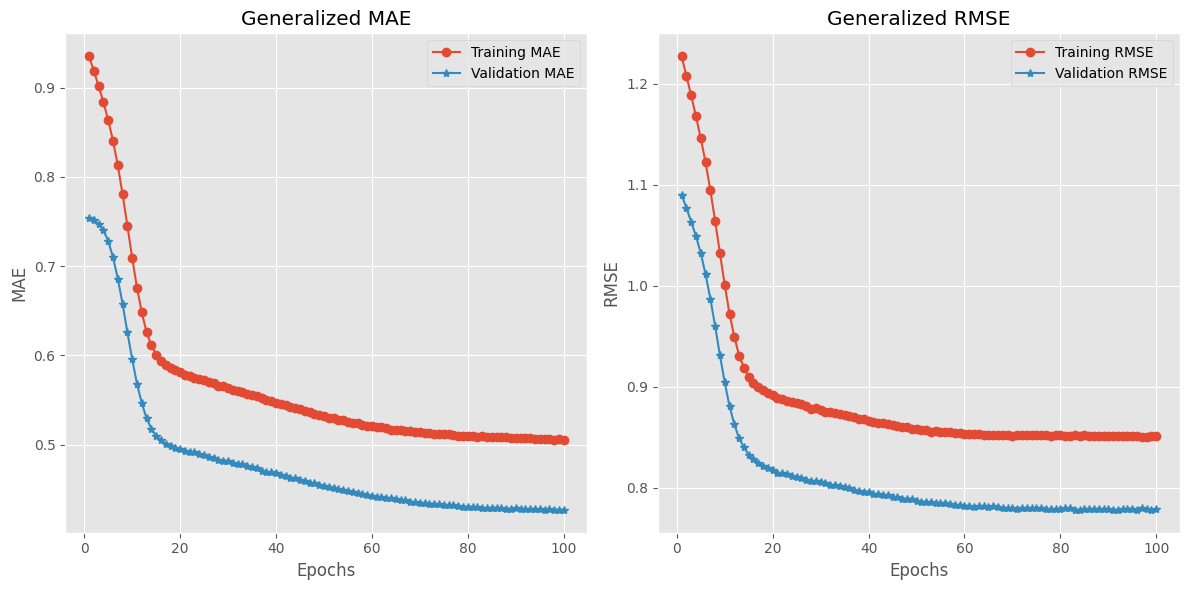

In [13]:
plot_loss_curves(history2)

In [17]:
model_all_train.eval()
abs_patients_errors, squared_patients_errors= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


In [10]:
# model_all_train.eval()  # Set the model to evaluation mode
# criterion = nn.MSELoss(reduction='none')  # MSE without reduction (so we can manually exclude masked values)
# running_test_loss = 0.0
# valid_preds = []
# valid_targets = []
# mask_value = -2.5
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model_all_train = model_all_train.to(device)
# rmse_patients_errors = {}
# mae_patients_errors = {}
# abs_patients_errors =  {key: [] for key in range(13)}
# squared_patients_errors =  {key: [] for key in range(13)}

# i=0
# with torch.no_grad():  # Disable gradient calculation for evaluation
#     for inputs, targets in test_loader:
#         i+=1
#         # Move data to device (GPU or CPU)
#         inputs = [inp.to(device) for inp in inputs]
#         targets = targets.to(device)
#         # print(targets[0])
#         # print(targets)
#         # Forward pass
#         outputs = model_all_train(inputs)
        
#         # # # Convert to numpy arrays for masking
#         outputs_np = outputs.cpu().numpy()
#         targets_np = targets.cpu().numpy()

#         for i in range(len(targets_np)): #this prints a list of 12 values of each patient
#             for j in range(len(targets_np[i])):
#                 if targets[i][j] != mask_value:
#                     sub_output = scaler.inverse_transform([[outputs_np[i][j]]])[0][0]
#                     sub_target = scaler.inverse_transform([[targets_np[i][j]]])[0][0]
#                     abs_patients_errors[j].append(abs(sub_output-sub_target))
#                     squared_patients_errors[j].append((sub_output-sub_target) ** 2)

In [19]:
patients_list = ['559', '563', '570', '575', '588', '591', '540', '544', '552', '567', '584', '596']
all_mae = []
all_rmse = []
for i in range(len(squared_patients_errors)-1):
    mae = np.mean(abs_patients_errors[i])
    rmse = np.sqrt(np.mean(squared_patients_errors[i]))
    all_mae.append(mae)
    all_rmse.append(rmse)
    print(f"{patients_list[i]}: RMSE: {rmse}, MAE: {mae}")
print(f"Average MAE: {np.mean(all_mae)}")
print(f"Average RMSE: {np.mean(all_rmse)}")


559: RMSE: 10.7892878791789, MAE: 8.134491284312814
563: RMSE: 15.864988953270464, MAE: 11.104398036610315
570: RMSE: 9.44019164483062, MAE: 6.730193080202984
575: RMSE: 19.179529405238775, MAE: 12.699248476284549
588: RMSE: 17.58048117944993, MAE: 12.753819199465097
591: RMSE: 17.933122740699307, MAE: 11.547077722432409
540: RMSE: 17.069087497336614, MAE: 12.689434651280996
544: RMSE: 16.087915565477807, MAE: 11.234599046075177
552: RMSE: 16.07376161696751, MAE: 12.850701684369467
567: RMSE: 26.235300465165842, MAE: 20.656728507850154
584: RMSE: 13.308503725980527, MAE: 10.743746769954258
596: RMSE: 24.78399173571093, MAE: 19.94710747708795
Average MAE: 12.590962161327182
Average RMSE: 17.02884686744227
